In [1]:
from bs4 import BeautifulSoup
import os 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
import re
import numpy as np
from scipy.stats import zscore
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from statistics import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import statsmodels.api as sm
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
import pickle
from transformation_functions import square_root_transformation , log_transformation , Reciprocal_transformation




In [2]:
folder_path = 'C:/Users/IMOE001/Downloads/data/data'
folder_path2 = 'C:/Users/IMOE001/Downloads/data/test' #small sample for testing 

In [3]:
from bs4 import BeautifulSoup

def extract_features(html_code):
    soup = BeautifulSoup(html_code, 'html.parser') # object of html code 
    features = {}
    
    car_info = soup.find('td', width='65%') # the first matching only 
    if car_info:
        features['اسم السيارة'] = car_info.find('h3').get_text(strip=True)  
        features['موديل السيارة'] = car_info.find('h5').get_text(strip=True)  
    
    car_price = soup.find('h5', class_='post-price')
    if car_price:
        for a_tag in car_price.find_all('a'): # return a list 
            a_tag.extract()
        features['سعر السيارة'] = car_price.get_text(strip=True) if car_price else None 
    
    car_characteristics = soup.find_all('tr', class_='list-row')
    for characteristic in car_characteristics:
        featurename_and_itsvalue = characteristic.find_all('td')
        feature_name = featurename_and_itsvalue[0].get_text(strip=True)
        feature_value = featurename_and_itsvalue[1].get_text(strip=True)
        features[feature_name] = feature_value    
    
    additions = soup.find('td', valign='top', text='إضافات')
    if additions:
        ul_element = additions.find_next('ul')
        li_elements = ul_element.find_all('li')

        list_of_additions = [li.get_text(strip=True) for li in li_elements if li.get_text(strip=True) != 'فتحة سقف']
        print(list_of_additions)
        num_additions = len(list_of_additions)
        features['Number_of_Additions'] = num_additions

        features['فتحة السقف'] = 1 if 'فتحة سقف' in [li.get_text(strip=True) for li in li_elements] else 0


    return features

In [ ]:
all_data = [] 
for filename in os.listdir(folder_path):
    file_path =folder_path  + '/' + filename
    with open(file_path, 'r', encoding='utf-8') as file:
        html_code = file.read()
        data_of_one_sample = extract_features(html_code)
        print(f" Sample: {data_of_one_sample}")
        all_data.append(data_of_one_sample)

#all features => list of dictionarys 

C:\Users\IMOE001\AppData\Local\Temp\ipykernel_68\3458181762.py:25: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  additions = soup.find('td', valign='top', text='إضافات')


['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا اوبتيما', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '100000 شيكل', 'لون السيارة': 'أبيض عاجي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '2000', 'عداد السيارة': '75000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'يد اولى', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-08-16', 'تاريخ إنتهاء الإعلان': '2017-09-15', 'Number_of_Additions': 7, 'فتحة السقف': 1}
 Sample: {}
 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا سورينتو', 'موديل السيارة': 'موديل سنة 2007', 'سعر السيارة': '60000 شيكل', 'لون السيارة': 'سكني', '

['مُكيّف', 'مسجل CD', 'جنطات مغنيسيوم']
 Sample: {'اسم السيارة': 'سكودا فابيا', 'موديل السيارة': 'موديل سنة 2012', 'سعر السيارة': '55000 شيكل', 'لون السيارة': 'أسود ميتالك', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1200', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'إضافات': 'مُكيّفمسجل CDجنطات مغنيسيوم', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-08-20', 'تاريخ إنتهاء الإعلان': '2017-09-19', 'Number_of_Additions': 3, 'فتحة السقف': 0}
 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا برايد', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '66000 شيكل', 'لون السيارة': 'فيراني', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1400', 'عداد السيارة': '79000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم']
 Sample: {'اسم السيارة': 'سكودا اوكتافيا', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '90000 شيكل', 'لون السيارة': 'عدة الوان', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع أو التبديل', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيوم', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-08-22', 'تاريخ إنتهاء الإعلان': '2017-09-21', 'Number_of_Additions': 5, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا فورتي', 'موديل السيارة': 'موديل سنة 2011', 'سعر السيارة': '67000 شيكل', 'لون السيارة': 'أسود', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عداد السيارة': '122,000', 'عدد

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي توسان', 'موديل السيارة': 'موديل سنة 2010', 'سعر السيارة': '85000 شيكل', 'لون السيارة': 'فيراني', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '2000', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-08-24', 'تاريخ إنتهاء الإعلان': '2017-09-08', 'Number_of_Additions': 7, 'فتحة السقف': 1}
['مُكيّف', 'إغلاق مركزي', 'مسجل CD', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فورد فيستا', 'موديل السيارة': 'موديل سنة 2012', 'سعر السيارة': '45000 شيكل', 'لون السيارة': 'بترولي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1250', 'عد

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن باسات', 'موديل السيارة': 'موديل سنة 2010', 'سعر السيارة': '85000 شيكل', 'لون السيارة': 'أسود ميتالك', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '2000', 'عداد السيارة': '190', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': '1', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيوموسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-08-29', 'تاريخ إنتهاء الإعلان': '2017-09-14', 'Number_of_Additions': 6, 'فتحة السقف': 0}
['مسجل CD', 'فرش جلد']
 Sample: {'اسم السيارة': 'فولكسفاجن ترانسبورتر', 'موديل السيارة': 'موديل سنة 1999', 'سعر السيارة': '37000 شيكل', 'لون السيارة': 'أبيض عاجي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'عمومي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكترون

 Sample: {}
 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'بي ام دبليو X3', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '215000 شيكل', 'لون السيارة': 'أسود', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '2000', 'عداد السيارة': '43000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': 'يد اولى', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-09-05', 'تاريخ إنتهاء الإعلان': '2017-10-05', 'Number_of_Additions': 7, 'فتحة السقف': 1}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فورد فيستا', 'موديل السيارة': 'موديل سنة 2013', 'سعر السيارة': '67000 شيكل', 'لون السيارة': 'أسود 

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'بي ام دبليو 520', 'موديل السيارة': 'موديل سنة 1994', 'سعر السيارة': '25000 شيكل', 'لون السيارة': 'كحلي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '2000', 'عداد السيارة': '200000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': '5', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-09-10', 'تاريخ إنتهاء الإعلان': '2017-10-10', 'Number_of_Additions': 7, 'فتحة السقف': 1}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي i25', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '60000 شيكل', 'لون السيارة': 'أسود ميتالك', 'نوع الوقود': 'بنزين', '

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'اوبل أوميغا', 'موديل السيارة': 'موديل سنة 1997', 'سعر السيارة': '33000 شيكل', 'لون السيارة': 'ذهبي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '2500', 'عداد السيارة': '200000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'يد ثانية', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-09-10', 'تاريخ إنتهاء الإعلان': '2017-10-10', 'Number_of_Additions': 7, 'فتحة السقف': 1}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا فورتي', 'موديل السيارة': 'موديل سنة 2008', 'سعر السيارة': '59500 شيكل', 'لون السيارة': 'أسود', 'نوع الوقود': 'بنزين', 'أصل الس

['مُكيّف', 'إغلاق مركزي', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'سكودا اوكتافيا', 'موديل السيارة': 'موديل سنة 2008', 'سعر السيارة': '60000 شيكل', 'لون السيارة': 'رمادي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1900', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': '2', 'إضافات': 'مُكيّفإغلاق مركزيمسجل CDجنطات مغنيسيوموسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-09-12', 'تاريخ إنتهاء الإعلان': '2017-10-12', 'Number_of_Additions': 5, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن طوارق', 'موديل السيارة': 'موديل سنة 2008', 'سعر السيارة': '130000 شيكل', 'لون السيارة': 'أسود', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج'

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي سانتافيه', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '135000 شيكل', 'لون السيارة': 'أبيض عاجي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '2000', 'عداد السيارة': '87000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': '1', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-11-22', 'تاريخ إنتهاء الإعلان': '2017-12-22', 'Number_of_Additions': 7, 'فتحة السقف': 1}
 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'مرسيدس C250', 'موديل السيارة': 'موديل سنة 2015', 'سعر السيارة': '175000 شيكل', 'لون السيارة': 'فيراني', 'نوع ا

['مُكيّف', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'دايو 2000', 'موديل السيارة': 'موديل سنة 2000', 'سعر السيارة': '30000 شيكل', 'لون السيارة': 'زيتي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'يدوي', 'قوة الماتور': '1600', 'عدد الركاب': '5+1', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': '6', 'إضافات': 'مُكيّفمسجل CDجنطات مغنيسيوموسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-09-18', 'تاريخ إنتهاء الإعلان': '2017-10-18', 'Number_of_Additions': 4, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'تويوتا كورولا', 'موديل السيارة': 'موديل سنة 1998', 'سعر السيارة': '44000 شيكل', 'لون السيارة': 'بنفسجي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عدد

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي اكسنت', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '66000 شيكل', 'لون السيارة': 'فضي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عداد السيارة': '94000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'يد ثانية', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-09-21', 'تاريخ إنتهاء الإعلان': '2017-10-21', 'Number_of_Additions': 6, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي فيرنا', 'موديل السيارة': 'موديل سنة 2008', 'سعر السيارة': '48000 شيكل', 'لون السيارة': 'سكني', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة الس

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي توسان', 'موديل السيارة': 'موديل سنة 2013', 'سعر السيارة': '90000 شيكل', 'لون السيارة': 'فضي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'نصف اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '2000', 'عداد السيارة': '82', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'يد ثانيه', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-09-24', 'تاريخ إنتهاء الإعلان': '2017-10-24', 'Number_of_Additions': 7, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي اكسنت', 'موديل السيارة': 'موديل سنة 2006', 'سعر السيارة': '38000 شيكل', 'لون السيارة': 'أزرق سماوي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة الس

 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا ريو', 'موديل السيارة': 'موديل سنة 2010', 'سعر السيارة': '43000 شيكل', 'لون السيارة': 'أبيض عاجي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'عمومي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1500', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': '......', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-09-26', 'تاريخ إنتهاء الإعلان': '2017-10-26', 'Number_of_Additions': 7, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن كادي', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '95000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هوندا سيفيك', 'موديل السيارة': 'موديل سنة 2008', 'سعر السيارة': '61000 شيكل', 'لون السيارة': 'أسود', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1800', 'عداد السيارة': '116000', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'ثانية', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-09-30', 'تاريخ إنتهاء الإعلان': '2017-10-30', 'Number_of_Additions': 7, 'فتحة السقف': 1}
[]
 Sample: {'اسم السيارة': 'دراجة نارية 2013', 'موديل السيارة': 'موديل سنة 2013', 'سعر السيارة': '7000 شيكل', 'لون السيارة': 'أسود', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '125', 'عد

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي اكسنت', 'موديل السيارة': 'موديل سنة 2011', 'سعر السيارة': '56500 شيكل', 'لون السيارة': 'جيشي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عداد السيارة': '133000', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيوموسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-10-03', 'تاريخ إنتهاء الإعلان': '2017-11-02', 'Number_of_Additions': 6, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا برايد', 'موديل السيارة': 'موديل سنة 2008', 'سعر السيارة': '46000 شيكل', 'لون السيارة': 'فضي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'سكودا اوكتافيا', 'موديل السيارة': 'موديل سنة 2009', 'سعر السيارة': '64000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'عمومي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1900', 'عداد السيارة': '5', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': '3', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيوموسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-10-07', 'تاريخ إنتهاء الإعلان': '2017-11-06', 'Number_of_Additions': 6, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'مرسيدس E300', 'موديل السيارة': 'موديل سنة 1999', 'سعر السيارة': '65000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير':

 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'ستروين بيكاسو C4', 'موديل السيارة': 'موديل سنة 2013', 'سعر السيارة': '100000 شيكل', 'لون السيارة': 'فضي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عداد السيارة': '100', 'عدد الركاب': '6+1', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': 'يد اولى', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارجنطات مغنيسيوموسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-10-08', 'تاريخ إنتهاء الإعلان': '2017-11-22', 'Number_of_Additions': 5, 'فتحة السقف': 0}
 Sample: {}
[]
 Sample: {'اسم السيارة': 'سوبارو نملة', 'موديل السيارة': 'موديل سنة 1984', 'سعر السيارة': '9500 شيكل', 'لون السيارة': 'فضي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'يدوي', 'قوة الماتور': '1600',

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'سكودا اوكتافيا', 'موديل السيارة': 'موديل سنة 2008', 'سعر السيارة': '50000 شيكل', 'لون السيارة': 'أصفر', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'عمومي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1900', 'عدد الركاب': '٤+١', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'يد ثانية', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-10-12', 'تاريخ إنتهاء الإعلان': '2017-10-27', 'Number_of_Additions': 6, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'مسجل CD', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'سكودا اوكتافيا', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '90000 شيكل', 'لون السيارة': 'سكني', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600'

['مسجل CD']
 Sample: {'اسم السيارة': 'مرسيدس 410', 'موديل السيارة': 'موديل سنة 1994', 'سعر السيارة': '26500 شيكل', 'لون السيارة': 'أبيض عاجي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'تجاري', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'يدوي', 'قوة الماتور': '2500', 'عداد السيارة': '490000', 'عدد الركاب': '2+1', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': '2', 'إضافات': 'مسجل CD', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-10-16', 'تاريخ إنتهاء الإعلان': '2017-11-15', 'Number_of_Additions': 1, 'فتحة السقف': 0}
['جهاز إنذار', 'مسجل CD']
 Sample: {'اسم السيارة': 'هونداي H1', 'موديل السيارة': 'موديل سنة 2006', 'سعر السيارة': '32000 شيكل', 'لون السيارة': 'أبيض عاجي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'عمومي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '2500', 'عدد الركاب': '٧+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'إضافات': 'جهاز إنذارمسجل CD', 'حالة الإعلان': 'إعلان منتهي',

['مُكيّف', 'جهاز إنذار', 'مسجل CD']
 Sample: {'اسم السيارة': 'فولكسفاجن بورا', 'موديل السيارة': 'موديل سنة 2004', 'سعر السيارة': '36000 شيكل', 'لون السيارة': 'أسود', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عداد السيارة': '950000', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': '2', 'إضافات': 'مُكيّفجهاز إنذارمسجل CDفتحة سقف', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-10-17', 'تاريخ إنتهاء الإعلان': '2017-11-16', 'Number_of_Additions': 3, 'فتحة السقف': 1}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن توران', 'موديل السيارة': 'موديل سنة 2010', 'سعر السيارة': '74900 شيكل', 'لون السيارة': 'أخضر', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1900', 'عداد السيارة'

['مُكيّف', 'إغلاق مركزي', 'مسجل CD', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'دايو ماتيز', 'موديل السيارة': 'موديل سنة 2001', 'سعر السيارة': '16000 شيكل', 'لون السيارة': 'أخضر', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '800', 'عداد السيارة': '160000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': 'اولى', 'إضافات': 'مُكيّفإغلاق مركزيمسجل CDوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-10-21', 'تاريخ إنتهاء الإعلان': '2017-11-20', 'Number_of_Additions': 4, 'فتحة السقف': 0}
['مُكيّف', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'بي ام دبليو 318', 'موديل السيارة': 'موديل سنة 2005', 'سعر السيارة': '80000 شيكل', 'لون السيارة': 'فضي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '2000', 'عدد الركا

['مسجل CD', 'جنطات مغنيسيوم']
 Sample: {'اسم السيارة': 'فيات اونو', 'موديل السيارة': 'موديل سنة 1986', 'سعر السيارة': '13500 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'يدوي', 'قوة الماتور': '1300', 'عداد السيارة': '00000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': '12', 'إضافات': 'مسجل CDجنطات مغنيسيوم', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-10-24', 'تاريخ إنتهاء الإعلان': '2017-11-23', 'Number_of_Additions': 2, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا فورتي', 'موديل السيارة': 'موديل سنة 2009', 'سعر السيارة': '57000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبي

 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD']
 Sample: {'اسم السيارة': 'اوبل فيكترا', 'موديل السيارة': 'موديل سنة 1998', 'سعر السيارة': '26000 شيكل', 'لون السيارة': 'أسود', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'يدوي', 'قوة الماتور': '1600', 'عداد السيارة': '84000', 'عدد الركاب': '4+١', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': '4', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CD', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-10-26', 'تاريخ إنتهاء الإعلان': '2017-11-25', 'Number_of_Additions': 4, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'اوبل استرا', 'موديل السيارة': 'موديل سنة 2003', 'سعر السيارة': '32000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '2000', 'عداد السيا

['جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد']
 Sample: {'اسم السيارة': 'فيات 127', 'موديل السيارة': 'موديل سنة 1975', 'سعر السيارة': '13000 شيكل', 'لون السيارة': 'أخضر', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '900', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': '5', 'إضافات': 'جهاز إنذارمسجل CDجنطات مغنيسيومفرش جلد', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-10-30', 'تاريخ إنتهاء الإعلان': '2017-11-29', 'Number_of_Additions': 4, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن جولف', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '97000 شيكل', 'لون السيارة': 'أسود', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1400', 'عدد الركاب': '4+1', 'وسيل

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'بيجو 307', 'موديل السيارة': 'موديل سنة 2007', 'سعر السيارة': '38000 شيكل', 'لون السيارة': 'خمري', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عداد السيارة': '100000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'يد اولى', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيوموسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-11-01', 'تاريخ إنتهاء الإعلان': '2017-12-01', 'Number_of_Additions': 6, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'مسجل CD', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي اكسنت', 'موديل السيارة': 'موديل سنة 2010', 'سعر السيارة': '40000 شيكل', 'لون السيارة': 'أزرق سماوي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'تأجير', 'رخصة السيارة': 'فلسطينية', 'نوع الجي

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'سكودا اوكتافيا', 'موديل السيارة': 'موديل سنة 2013', 'سعر السيارة': '82000 شيكل', 'لون السيارة': 'أسود ميتالك', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عداد السيارة': '٧١٠٠٠', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيوموسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-11-05', 'تاريخ إنتهاء الإعلان': '2017-12-05', 'Number_of_Additions': 6, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا سول', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '75000 شيكل', 'لون السيارة': 'بيج', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجا

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي افانتي', 'موديل السيارة': 'موديل سنة 2006', 'سعر السيارة': '42000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عداد السيارة': '1234', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': '2', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-11-07', 'تاريخ إنتهاء الإعلان': '2017-12-07', 'Number_of_Additions': 6, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن جولف', 'موديل السيارة': 'موديل سنة 2003', 'سعر السيارة': '50000 شيكل', 'لون السيارة': 'كحلي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فل

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'بي ام دبليو 530', 'موديل السيارة': 'موديل سنة 2007', 'سعر السيارة': '125000 شيكل', 'لون السيارة': 'أسود ميتالك', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '3000', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-11-09', 'تاريخ إنتهاء الإعلان': '2017-12-24', 'Number_of_Additions': 7, 'فتحة السقف': 1}
 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا ماجنتيس', 'موديل السيارة': 'موديل سنة 2010', 'سعر السيارة': '45000 شيكل', 'لون السيارة': 'أبيض عاجي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'عمومي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير':

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد']
 Sample: {'اسم السيارة': 'كيا ريو', 'موديل السيارة': 'موديل سنة 2004', 'سعر السيارة': '30000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'تدريب سياقة', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1400', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'يد ثانية', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيومفرش جلد', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-11-12', 'تاريخ إنتهاء الإعلان': '2017-12-27', 'Number_of_Additions': 6, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي توسان', 'موديل السيارة': 'موديل سنة 2008', 'سعر السيارة': '64000 شيكل', 'لون السيارة': 'فضي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', '

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'مرسيدس 914', 'موديل السيارة': 'موديل سنة 1996', 'سعر السيارة': '5700 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'تدريب سياقة', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '4000', 'عداد السيارة': '٣٠٠٠', 'عدد الركاب': '٤+١', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'يد اولى', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-11-14', 'تاريخ إنتهاء الإعلان': '2017-12-14', 'Number_of_Additions': 7, 'فتحة السقف': 1}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي اكسنت', 'موديل السيارة': 'موديل سنة 2015', 'سعر السيارة': '70000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي'

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي i30', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '78000 شيكل', 'لون السيارة': 'أبيض عاجي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عداد السيارة': '50000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': '2', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطات مغنيسيوموسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-11-16', 'تاريخ إنتهاء الإعلان': '2017-12-06', 'Number_of_Additions': 6, 'فتحة السقف': 1}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي i20', 'موديل السيارة': 'موديل سنة 2010', 'سعر السيارة': '35000 شيكل', 'لون السيارة': 'أسود', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'تأجي

 Sample: {}
 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي توسان', 'موديل السيارة': 'موديل سنة 2006', 'سعر السيارة': '59000 شيكل', 'لون السيارة': 'أسود ميتالك', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '2000', 'عدد الركاب': '5+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': '4', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-11-19', 'تاريخ إنتهاء الإعلان': '2017-12-19', 'Number_of_Additions': 7, 'فتحة السقف': 1}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا اوبتيما', 'موديل السيارة': 'موديل سنة 2013', 'سعر السيارة': '85000 شيكل', 'لون السيارة': 'أسود', 'نوع الوقود': 'بنزين', 'أصل الس

 Sample: {}
 Sample: {}
['مُكيّف', 'جهاز إنذار', 'مسجل CD']
 Sample: {'اسم السيارة': 'فولفو 2007', 'موديل السيارة': 'موديل سنة 2007', 'سعر السيارة': '230000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '2800', 'عداد السيارة': '١٥٠٠٠', 'عدد الركاب': '1+2', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': 'يد ثانيه', 'إضافات': 'مُكيّفجهاز إنذارمسجل CD', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-11-22', 'تاريخ إنتهاء الإعلان': '2017-12-22', 'Number_of_Additions': 3, 'فتحة السقف': 0}
 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا برايد', 'موديل السيارة': 'موديل سنة 2012', 'سعر السيارة': '56000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1400', 'عداد السيارة': '750

['فرش جلد']
 Sample: {'اسم السيارة': 'كيا ريو', 'موديل السيارة': 'موديل سنة 2010', 'سعر السيارة': '43000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'عمومي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1500', 'عداد السيارة': '0000000000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': '6', 'إضافات': 'فرش جلد', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-11-27', 'تاريخ إنتهاء الإعلان': '2017-12-17', 'Number_of_Additions': 1, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'جنطات مغنيسيوم']
 Sample: {'اسم السيارة': 'هونداي افانتي', 'موديل السيارة': 'موديل سنة 2006', 'سعر السيارة': '37000 شيكل', 'لون السيارة': 'أبيض عاجي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عداد السيارة': '123', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'ل

['مُكيّف', 'مسجل CD', 'فرش جلد']
 Sample: {'اسم السيارة': 'رينو R9', 'موديل السيارة': 'موديل سنة 1983', 'سعر السيارة': '4000 شيكل', 'لون السيارة': 'رصاصي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1400', 'عداد السيارة': '١١١١١', 'عدد الركاب': '١+٤', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': '٥', 'إضافات': 'مُكيّفمسجل CDفرش جلد', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-12-02', 'تاريخ إنتهاء الإعلان': '2018-01-01', 'Number_of_Additions': 3, 'فتحة السقف': 0}
 Sample: {}
['إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'مرسيدس 200', 'موديل السيارة': 'موديل سنة 1983', 'سعر السيارة': '20000 شيكل', 'لون السيارة': 'بني', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '200', 'عداد السيارة': '6666', 'عدد 

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا برايد', 'موديل السيارة': 'موديل سنة 2007', 'سعر السيارة': '47000 شيكل', 'لون السيارة': 'أسود', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1400', 'عداد السيارة': '880000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيوموسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-12-06', 'تاريخ إنتهاء الإعلان': '2018-01-05', 'Number_of_Additions': 6, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'اوبل فيكترا', 'موديل السيارة': 'موديل سنة 1998', 'سعر السيارة': '29000 شيكل', 'لون السيارة': 'أسود', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج':

 Sample: {}
 Sample: {}
['مُكيّف', 'مسجل CD']
 Sample: {'اسم السيارة': 'سوبارو عريض', 'موديل السيارة': 'موديل سنة 1985', 'سعر السيارة': '18000 شيكل', 'لون السيارة': 'سكني', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'يدوي', 'قوة الماتور': '1600', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'يد ثانية', 'إضافات': 'مُكيّفمسجل CD', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-12-10', 'تاريخ إنتهاء الإعلان': '2018-01-09', 'Number_of_Additions': 2, 'فتحة السقف': 0}
['مُكيّف', 'مسجل CD']
 Sample: {'اسم السيارة': 'فولفو FL 12', 'موديل السيارة': 'موديل سنة 1997', 'سعر السيارة': '50000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'تجاري', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1800', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'إضافات': 'مُكيّفمسجل CDفتحة سقف', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر ا

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن جولف', 'موديل السيارة': 'موديل سنة 2003', 'سعر السيارة': '55000 شيكل', 'لون السيارة': 'فضي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عداد السيارة': '124000', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': '1', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارفتحة سقفجنطات مغنيسيوموسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-12-12', 'تاريخ إنتهاء الإعلان': '2017-12-27', 'Number_of_Additions': 5, 'فتحة السقف': 1}
 Sample: {}
 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'نيسان ميكرا', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '55000 شيكل', 'لون السيارة': 'أبيض عاجي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فل

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'اودي Q7', 'موديل السيارة': 'موديل سنة 2008', 'سعر السيارة': '175000 شيكل', 'لون السيارة': 'أبيض عاجي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '3600', 'عداد السيارة': '120000', 'عدد الركاب': '6+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'يد ثانية', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-12-14', 'تاريخ إنتهاء الإعلان': '2018-01-03', 'Number_of_Additions': 7, 'فتحة السقف': 1}
['مُكيّف', 'إغلاق مركزي', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'سيت ليون', 'موديل السيارة': 'موديل سنة 2015', 'سعر السيارة': '83000 شيكل', 'لون السيارة': 'أزرق', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فل

 Sample: {}
 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي اكسنت', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '67000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1400', 'عدد الركاب': '٤+١', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-12-18', 'تاريخ إنتهاء الإعلان': '2018-01-17', 'Number_of_Additions': 7, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي سانتافيه', 'موديل السيارة': 'موديل سنة 2015', 'سعر السيارة': '133000 شيكل', 'لون السيارة': 'بترولي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي i30', 'موديل السيارة': 'موديل سنة 2008', 'سعر السيارة': '49000 شيكل', 'لون السيارة': 'أسود ميتالك', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عداد السيارة': '145', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-12-21', 'تاريخ إنتهاء الإعلان': '2018-01-20', 'Number_of_Additions': 7, 'فتحة السقف': 1}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'ميتسوبيشي باجيرو', 'موديل السيارة': 'موديل سنة 2006', 'سعر السيارة': '100000 شيكل', 'لون السيارة': 'سكني', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'ر

['مُكيّف', 'إغلاق مركزي', 'مسجل CD', 'جنطات مغنيسيوم']
 Sample: {'اسم السيارة': 'فولكسفاجن باسات', 'موديل السيارة': 'موديل سنة 2002', 'سعر السيارة': '45000 شيكل', 'لون السيارة': 'أزرق سماوي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1900', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': 'يد خامسه', 'إضافات': 'مُكيّفإغلاق مركزيمسجل CDجنطات مغنيسيوم', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-12-25', 'تاريخ إنتهاء الإعلان': '2018-02-08', 'Number_of_Additions': 4, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا برايد', 'موديل السيارة': 'موديل سنة 2013', 'سعر السيارة': '60000 شيكل', 'لون السيارة': 'فيراني', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1400', 'عداد السيار

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'ايسوزو تروبر', 'موديل السيارة': 'موديل سنة 2001', 'سعر السيارة': '10500 شيكل', 'لون السيارة': 'رصاصي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'نمرة صفراء', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '3000', 'عداد السيارة': '1234567', 'عدد الركاب': '6+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': '3', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2017-12-27', 'تاريخ إنتهاء الإعلان': '2018-01-26', 'Number_of_Additions': 7, 'فتحة السقف': 0}
 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا برايد', 'موديل السيارة': 'موديل سنة 2007', 'سعر السيارة': '41500 شيكل', 'لون السيارة': 'أحمر', 'نوع الوقود': 'بنزين', 'أصل ال

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'مرسيدس C270', 'موديل السيارة': 'موديل سنة 2003', 'سعر السيارة': '60000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '270', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع أو التبديل', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-01-01', 'تاريخ إنتهاء الإعلان': '2018-01-31', 'Number_of_Additions': 7, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن كادي', 'موديل السيارة': 'موديل سنة 2015', 'سعر السيارة': '100000 شيكل', 'لون السيارة': 'فيراني', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD']
 Sample: {'اسم السيارة': 'جي ام سي  سفانا', 'موديل السيارة': 'موديل سنة 2000', 'سعر السيارة': '43000 شيكل', 'لون السيارة': 'رمادي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'تجاري', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '6500', 'عداد السيارة': '666666', 'عدد الركاب': '8+1', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': '2', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CD', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-01-04', 'تاريخ إنتهاء الإعلان': '2018-02-03', 'Number_of_Additions': 4, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'اوبل كورسا', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '52000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة المات

 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد']
 Sample: {'اسم السيارة': 'مرسيدس 220', 'موديل السيارة': 'موديل سنة 1995', 'سعر السيارة': '22000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'عمومي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '2200', 'عداد السيارة': 'شغال', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': '11', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيومفرش جلد', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-01-09', 'تاريخ إنتهاء الإعلان': '2018-02-08', 'Number_of_Additions': 6, 'فتحة السقف': 0}
 Sample: {}
 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'ميتسوبيشي سبيس ستار', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '55000 شيكل', 'لون السيارة': 'خمري', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطين

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا برايد', 'موديل السيارة': 'موديل سنة 2007', 'سعر السيارة': '38000 شيكل', 'لون السيارة': 'أزرق', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1400', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع أو التبديل', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-01-13', 'تاريخ إنتهاء الإعلان': '2018-01-29', 'Number_of_Additions': 5, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي جيتس', 'موديل السيارة': 'موديل سنة 2007', 'سعر السيارة': '32000 شيكل', 'لون السيارة': 'أبيض عاجي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عداد السيارة': '115000', 'عد

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'سيت ليون', 'موديل السيارة': 'موديل سنة 2015', 'سعر السيارة': '69000 شيكل', 'لون السيارة': 'فضي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1200', 'عداد السيارة': '٣٢٠٠٠', 'عدد الركاب': '٤+١', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': '٠', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-01-15', 'تاريخ إنتهاء الإعلان': '2018-02-14', 'Number_of_Additions': 7, 'فتحة السقف': 0}
 Sample: {}
['إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'سكودا اوكتافيا رمش', 'موديل السيارة': 'موديل سنة 2009', 'سعر السيارة': '680000 شيكل', 'لون السيارة': 'أسود', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فورد فوكس', 'موديل السيارة': 'موديل سنة 2012', 'سعر السيارة': '55000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع أو التبديل', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-01-20', 'تاريخ إنتهاء الإعلان': '2018-02-19', 'Number_of_Additions': 7, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'مسجل CD', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'شفروليه سبارك', 'موديل السيارة': 'موديل سنة 2015', 'سعر السيارة': '57000 شيكل', 'لون السيارة': 'أزرق سماوي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة ا

['مُكيّف', 'إغلاق مركزي', 'مسجل CD', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'سكودا رابيد', 'موديل السيارة': 'موديل سنة 2014', 'سعر السيارة': '70000 شيكل', 'لون السيارة': 'كحلي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'إضافات': 'مُكيّفإغلاق مركزيمسجل CDوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-01-29', 'تاريخ إنتهاء الإعلان': '2018-02-28', 'Number_of_Additions': 4, 'فتحة السقف': 0}
 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'مرسيدس 416', 'موديل السيارة': 'موديل سنة 2006', 'سعر السيارة': '125000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'تجاري', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '2700', 'عداد السيارة': '500000', 'عدد الركاب': '6+1', 'وسي

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم']
 Sample: {'اسم السيارة': 'فولكسفاجن بورا', 'موديل السيارة': 'موديل سنة 2005', 'سعر السيارة': '40000 شيكل', 'لون السيارة': 'فضي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'عمومي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1900', 'عداد السيارة': '5', 'عدد الركاب': '5+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': '4', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيوم', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-01-27', 'تاريخ إنتهاء الإعلان': '2018-02-26', 'Number_of_Additions': 5, 'فتحة السقف': 0}
 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي اكسنت', 'موديل السيارة': 'موديل سنة 2002', 'سعر السيارة': '32000 شيكل', 'لون السيارة': 'أخضر', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج'

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'سكودا اوكتافيا', 'موديل السيارة': 'موديل سنة 2011', 'سعر السيارة': '65000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'عمومي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عداد السيارة': 'ما انتبهت', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': '3', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-01-31', 'تاريخ إنتهاء الإعلان': '2018-02-15', 'Number_of_Additions': 6, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'سكودا اوكتافيا', 'موديل السيارة': 'موديل سنة 2016', 'سعر السيارة': '115000 شيكل', 'لون السيارة': 'عدة الوان', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتومات

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فيات بونتو', 'موديل السيارة': 'موديل سنة 2010', 'سعر السيارة': '33000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'تأجير', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'الكتروني', 'قوة الماتور': '1600', 'عداد السيارة': '250000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'يدثانيه', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-02-03', 'تاريخ إنتهاء الإعلان': '2018-03-05', 'Number_of_Additions': 5, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي جيتس', 'موديل السيارة': 'موديل سنة 2009', 'سعر السيارة': '4000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'تأجير', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوما

 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'سيت ليون', 'موديل السيارة': 'موديل سنة 2015', 'سعر السيارة': '89000 شيكل', 'لون السيارة': 'رصاصي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1200', 'عداد السيارة': '35000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': '.', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسيوموسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-02-13', 'تاريخ إنتهاء الإعلان': '2018-03-15', 'Number_of_Additions': 6, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'هونداي توسان', 'موديل السيارة': 'موديل سنة 2012', 'سعر السيارة': '85000 شيكل', 'لون السيارة': 'فضي', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خ

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا بيكانتو', 'موديل السيارة': 'موديل سنة 2015', 'سعر السيارة': '47000 شيكل', 'لون السيارة': 'فضي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1250', 'عداد السيارة': '40000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': '0', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-02-08', 'تاريخ إنتهاء الإعلان': '2018-02-23', 'Number_of_Additions': 5, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فورد ايدج', 'موديل السيارة': 'موديل سنة 2011', 'سعر السيارة': '110000 شيكل', 'لون السيارة': 'رصاصي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتومات

 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن جولف', 'موديل السيارة': 'موديل سنة 2012', 'سعر السيارة': '155000 شيكل', 'لون السيارة': 'أزرق', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'نصف اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '2000', 'عداد السيارة': '90000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'أصحاب سابقون': 'يد اولى', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطات مغنيسيوموسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-02-12', 'تاريخ إنتهاء الإعلان': '2018-03-14', 'Number_of_Additions': 6, 'فتحة السقف': 1}
 Sample: {}
 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن بولو', 'موديل السيارة': 'موديل سنة 2015', 'سعر السيارة': '62000 شيكل', 'لون السيارة': 'بني', 'نوع الوقود': 

['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'كيا مورننغ', 'موديل السيارة': 'موديل سنة 2015', 'سعر السيارة': '46000 شيكل', 'لون السيارة': 'أبيض', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '1000', 'عداد السيارة': '٦٠', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع أو التبديل', 'أصحاب سابقون': '0', 'إضافات': 'مُكيّفإغلاق مركزيجهاز إنذارمسجل CDوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-02-15', 'تاريخ إنتهاء الإعلان': '2018-03-02', 'Number_of_Additions': 5, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'ميتسوبيشي باجيرو', 'موديل السيارة': 'موديل سنة 2008', 'سعر السيارة': '97000 شيكل', 'لون السيارة': 'سكني', 'نوع الوقود': 'ديزل', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 

['مُكيّف', 'إغلاق مركزي', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'بي ام دبليو ٣٣٠i', 'موديل السيارة': 'موديل سنة 2006', 'سعر السيارة': '155000 شيكل', 'لون السيارة': 'أبيض عاجي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'نصف اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '3000', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'نقدا فقط', 'معروضة': 'للبيع فقط', 'إضافات': 'مُكيّفإغلاق مركزيمسجل CDفتحة سقفجنطات مغنيسيومفرش جلدوسادة حماية هوائية', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-02-19', 'تاريخ إنتهاء الإعلان': '2018-03-21', 'Number_of_Additions': 6, 'فتحة السقف': 1}
 Sample: {}
['مُكيّف', 'إغلاق مركزي', 'مسجل CD', 'جنطات مغنيسيوم']
 Sample: {'اسم السيارة': 'بيجو 307', 'موديل السيارة': 'موديل سنة 2007', 'سعر السيارة': '30000 شيكل', 'لون السيارة': 'كحلي', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة ال

['إغلاق مركزي', 'جهاز إنذار', 'جنطات مغنيسيوم']
 Sample: {'اسم السيارة': 'فولكسفاجن جولف', 'موديل السيارة': 'موديل سنة 1995', 'سعر السيارة': '22000 شيكل', 'لون السيارة': 'أحمر', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'تأجير', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'عادي', 'الزجاج': 'يدوي', 'قوة الماتور': '1300', 'عدد الركاب': '4+1', 'وسيلة الدفع': 'إمكانية التقسيط', 'معروضة': 'للبيع أو التبديل', 'إضافات': 'إغلاق مركزيجهاز إنذارجنطات مغنيسيوم', 'حالة الإعلان': 'إعلان منتهي', 'تاريخ نشر الإعلان': '2018-02-22', 'تاريخ إنتهاء الإعلان': '2018-04-08', 'Number_of_Additions': 3, 'فتحة السقف': 0}
['مُكيّف', 'إغلاق مركزي', 'جهاز إنذار', 'مسجل CD', 'جنطات مغنيسيوم', 'فرش جلد', 'وسادة حماية هوائية']
 Sample: {'اسم السيارة': 'فولكسفاجن باسات', 'موديل السيارة': 'موديل سنة 2008', 'سعر السيارة': '65000 شيكل', 'لون السيارة': 'أسود', 'نوع الوقود': 'بنزين', 'أصل السيارة': 'خصوصي', 'رخصة السيارة': 'فلسطينية', 'نوع الجير': 'اوتوماتيك', 'الزجاج': 'الكتروني', 'قوة الماتور': '2000', 'عداد السيارة': '١٧٠٠٠٠',

In [ ]:
cars_data = pd.DataFrame(all_data)

In [ ]:
cars_data

In [ ]:
#total_rows_with_missing_values =cars_data.isnull().all(axis=1).sum()
#total_rows_with_missing_values

In [ ]:
csv_file_path = 'C:\\Users\\IMOE001\\Desktop\\cars_data.csv'
cars_data.to_csv(csv_file_path, index=False)

In [159]:
cars_data = pd.read_csv('cars_data.csv')

In [160]:
cars_data 

,اسم السيارة,موديل السيارة,سعر السيارة,لون السيارة,نوع الوقود,أصل السيارة,رخصة السيارة,نوع الجير,الزجاج,قوة الماتور,...,وسيلة الدفع,معروضة,أصحاب سابقون,إضافات,حالة الإعلان,تاريخ نشر الإعلان,تاريخ إنتهاء الإعلان,Number_of_Additions,فتحة السقف,الدفع
0,كيا اوبتيما,موديل سنة 2014,100000 شيكل,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,...,نقدا فقط,للبيع فقط,يد اولى,مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطا...,إعلان منتهي,2017-08-16,2017-09-15,7.0,1.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,كيا سورينتو,موديل سنة 2007,60000 شيكل,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500.0,...,إمكانية التقسيط,للبيع أو التبديل,2,مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطا...,إعلان منتهي,2017-08-16,2017-09-30,7.0,1.0,NaN
4,هونداي افانتي,موديل سنة 2006,43500 شيكل,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,...,نقدا فقط,للبيع فقط,NaN,مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسي...,إعلان منتهي,2017-08-19,2017-09-18,7.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983,مرسيدس C220,موديل سنة 2009,90000 شيكل,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200.0,...,نقدا فقط,للبيع فقط,يد ثانية,مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقفجنطا...,إعلان منتهي,2022-05-07,2022-07-06,7.0,1.0,دفع خلفي
6984,نيسان كشكاي,موديل سنة 2014,95000 شيكل,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,...,إمكانية التقسيط,للبيع فقط,يد اولا,مُكيّفإغلاق مركزيجهاز إنذارمسجل CDفتحة سقففرش ...,إعلان منتهي,2022-05-07,2022-06-06,6.0,1.0,دفع أمامي
6985,سكودا اوكتافيا,موديل سنة 2020,160000 شيكل,أبيض,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,...,إمكانية التقسيط,للبيع أو التبديل,0,مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسي...,إعلان منتهي,2022-05-08,2022-07-07,7.0,0.0,دفع أمامي
6986,سكودا سوبيرب,موديل سنة 2018,119000 شيكل,أسود,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,...,نقدا فقط,للبيع فقط,0,مُكيّفإغلاق مركزيجهاز إنذارمسجل CDجنطات مغنيسي...,إعلان منتهي,2022-05-08,2022-06-12,6.0,0.0,دفع أمامي


In [161]:
cars_data = cars_data.drop(columns= 'إضافات')


# 21 features 

In [162]:
cars_data.shape[1]

21

# 6988  samples 

In [163]:
cars_data.shape[0]

6988

In [164]:
total_rows_with_missing_values = cars_data.isnull().all(axis=1).sum()
total_rows_with_missing_values 

827

This mean 827 html page dont contain required data about cars 

In [165]:
total_columns_with_missing_values = cars_data.isnull().all(axis=0).sum()
total_columns_with_missing_values

0

# drop the rows with missing values 

In [166]:
cars_data = cars_data.dropna(how='all')


In [167]:
cars_data.reindex()

,اسم السيارة,موديل السيارة,سعر السيارة,لون السيارة,نوع الوقود,أصل السيارة,رخصة السيارة,نوع الجير,الزجاج,قوة الماتور,...,عدد الركاب,وسيلة الدفع,معروضة,أصحاب سابقون,حالة الإعلان,تاريخ نشر الإعلان,تاريخ إنتهاء الإعلان,Number_of_Additions,فتحة السقف,الدفع
0,كيا اوبتيما,موديل سنة 2014,100000 شيكل,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,...,4+1,نقدا فقط,للبيع فقط,يد اولى,إعلان منتهي,2017-08-16,2017-09-15,7.0,1.0,NaN
3,كيا سورينتو,موديل سنة 2007,60000 شيكل,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500.0,...,7+1,إمكانية التقسيط,للبيع أو التبديل,2,إعلان منتهي,2017-08-16,2017-09-30,7.0,1.0,NaN
4,هونداي افانتي,موديل سنة 2006,43500 شيكل,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,...,NaN,نقدا فقط,للبيع فقط,NaN,إعلان منتهي,2017-08-19,2017-09-18,7.0,0.0,NaN
6,فيات 127,موديل سنة 1982,5500 شيكل,بيج,بنزين,خصوصي,فلسطينية,عادي,يدوي,906.0,...,4+1,إمكانية التقسيط,للبيع فقط,00,إعلان منتهي,2017-08-17,2017-09-22,2.0,0.0,NaN
7,بيجو 208,موديل سنة 2014,54000 شيكل,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200.0,...,4+1,نقدا فقط,للبيع فقط,NaN,إعلان منتهي,2017-08-17,2017-10-01,5.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983,مرسيدس C220,موديل سنة 2009,90000 شيكل,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200.0,...,4+1,نقدا فقط,للبيع فقط,يد ثانية,إعلان منتهي,2022-05-07,2022-07-06,7.0,1.0,دفع خلفي
6984,نيسان كشكاي,موديل سنة 2014,95000 شيكل,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,...,4+1,إمكانية التقسيط,للبيع فقط,يد اولا,إعلان منتهي,2022-05-07,2022-06-06,6.0,1.0,دفع أمامي
6985,سكودا اوكتافيا,موديل سنة 2020,160000 شيكل,أبيض,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,...,4+1,إمكانية التقسيط,للبيع أو التبديل,0,إعلان منتهي,2022-05-08,2022-07-07,7.0,0.0,دفع أمامي
6986,سكودا سوبيرب,موديل سنة 2018,119000 شيكل,أسود,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,...,4+1,نقدا فقط,للبيع فقط,0,إعلان منتهي,2022-05-08,2022-06-12,6.0,0.0,دفع أمامي


In [168]:
missing_values_in_the_features = cars_data.isnull().sum()
missing_values_in_the_features

اسم السيارة                0
موديل السيارة              0
سعر السيارة                0
لون السيارة                0
نوع الوقود                 0
أصل السيارة                0
رخصة السيارة               0
نوع الجير                  0
الزجاج                     0
قوة الماتور                0
عداد السيارة            1781
عدد الركاب               714
وسيلة الدفع                0
معروضة                     0
أصحاب سابقون            1500
حالة الإعلان               0
تاريخ نشر الإعلان          0
تاريخ إنتهاء الإعلان       0
Number_of_Additions        0
فتحة السقف                 0
الدفع                   5235
dtype: int64

# The feature with the most missing values 'الدفع'

In [169]:
# drop الدفع feature 
cars_data = cars_data.drop(columns='الدفع')


In [170]:
cars_data

,اسم السيارة,موديل السيارة,سعر السيارة,لون السيارة,نوع الوقود,أصل السيارة,رخصة السيارة,نوع الجير,الزجاج,قوة الماتور,عداد السيارة,عدد الركاب,وسيلة الدفع,معروضة,أصحاب سابقون,حالة الإعلان,تاريخ نشر الإعلان,تاريخ إنتهاء الإعلان,Number_of_Additions,فتحة السقف
0,كيا اوبتيما,موديل سنة 2014,100000 شيكل,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,75000,4+1,نقدا فقط,للبيع فقط,يد اولى,إعلان منتهي,2017-08-16,2017-09-15,7.0,1.0
3,كيا سورينتو,موديل سنة 2007,60000 شيكل,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500.0,130000,7+1,إمكانية التقسيط,للبيع أو التبديل,2,إعلان منتهي,2017-08-16,2017-09-30,7.0,1.0
4,هونداي افانتي,موديل سنة 2006,43500 شيكل,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,NaN,NaN,نقدا فقط,للبيع فقط,NaN,إعلان منتهي,2017-08-19,2017-09-18,7.0,0.0
6,فيات 127,موديل سنة 1982,5500 شيكل,بيج,بنزين,خصوصي,فلسطينية,عادي,يدوي,906.0,شغال,4+1,إمكانية التقسيط,للبيع فقط,00,إعلان منتهي,2017-08-17,2017-09-22,2.0,0.0
7,بيجو 208,موديل سنة 2014,54000 شيكل,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200.0,38000,4+1,نقدا فقط,للبيع فقط,NaN,إعلان منتهي,2017-08-17,2017-10-01,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983,مرسيدس C220,موديل سنة 2009,90000 شيكل,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200.0,180000,4+1,نقدا فقط,للبيع فقط,يد ثانية,إعلان منتهي,2022-05-07,2022-07-06,7.0,1.0
6984,نيسان كشكاي,موديل سنة 2014,95000 شيكل,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,NaN,4+1,إمكانية التقسيط,للبيع فقط,يد اولا,إعلان منتهي,2022-05-07,2022-06-06,6.0,1.0
6985,سكودا اوكتافيا,موديل سنة 2020,160000 شيكل,أبيض,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,25000,4+1,إمكانية التقسيط,للبيع أو التبديل,0,إعلان منتهي,2022-05-08,2022-07-07,7.0,0.0
6986,سكودا سوبيرب,موديل سنة 2018,119000 شيكل,أسود,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,110,4+1,نقدا فقط,للبيع فقط,0,إعلان منتهي,2022-05-08,2022-06-12,6.0,0.0


In [171]:
maping_description = {
    
    'اسم السيارة' : 'Name',
    "لون السيارة": 'color',
    "نوع الوقود": 'fuel_type',
    "أصل السيارة": 'origin_car',
    "عداد السيارة": 'car_speedometer',
    "أصحاب سابقون": 'ex_owners',
    "رخصة السيارة": 'car_license',
    "نوع الجير": 'lime_type',
    "الزجاج": 'glass',
    "قوة الماتور": 'motor_power',
    "عدد الركاب": 'passengers',
    'فتحة السقف': 'sunroof',
    'موديل السيارة' : 'model',
    'سعر السيارة': 'Price',

}

# Create a new DataFrame with updated column names
cars_data= cars_data.rename(columns=maping_description)

# Display the new DataFrame
cars_data

,Name,model,Price,color,fuel_type,origin_car,car_license,lime_type,glass,motor_power,car_speedometer,passengers,وسيلة الدفع,معروضة,ex_owners,حالة الإعلان,تاريخ نشر الإعلان,تاريخ إنتهاء الإعلان,Number_of_Additions,sunroof
0,كيا اوبتيما,موديل سنة 2014,100000 شيكل,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,75000,4+1,نقدا فقط,للبيع فقط,يد اولى,إعلان منتهي,2017-08-16,2017-09-15,7.0,1.0
3,كيا سورينتو,موديل سنة 2007,60000 شيكل,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500.0,130000,7+1,إمكانية التقسيط,للبيع أو التبديل,2,إعلان منتهي,2017-08-16,2017-09-30,7.0,1.0
4,هونداي افانتي,موديل سنة 2006,43500 شيكل,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,NaN,NaN,نقدا فقط,للبيع فقط,NaN,إعلان منتهي,2017-08-19,2017-09-18,7.0,0.0
6,فيات 127,موديل سنة 1982,5500 شيكل,بيج,بنزين,خصوصي,فلسطينية,عادي,يدوي,906.0,شغال,4+1,إمكانية التقسيط,للبيع فقط,00,إعلان منتهي,2017-08-17,2017-09-22,2.0,0.0
7,بيجو 208,موديل سنة 2014,54000 شيكل,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200.0,38000,4+1,نقدا فقط,للبيع فقط,NaN,إعلان منتهي,2017-08-17,2017-10-01,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983,مرسيدس C220,موديل سنة 2009,90000 شيكل,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200.0,180000,4+1,نقدا فقط,للبيع فقط,يد ثانية,إعلان منتهي,2022-05-07,2022-07-06,7.0,1.0
6984,نيسان كشكاي,موديل سنة 2014,95000 شيكل,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,NaN,4+1,إمكانية التقسيط,للبيع فقط,يد اولا,إعلان منتهي,2022-05-07,2022-06-06,6.0,1.0
6985,سكودا اوكتافيا,موديل سنة 2020,160000 شيكل,أبيض,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,25000,4+1,إمكانية التقسيط,للبيع أو التبديل,0,إعلان منتهي,2022-05-08,2022-07-07,7.0,0.0
6986,سكودا سوبيرب,موديل سنة 2018,119000 شيكل,أسود,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,110,4+1,نقدا فقط,للبيع فقط,0,إعلان منتهي,2022-05-08,2022-06-12,6.0,0.0


# عداد السيارة , عدد الركاب , اصحاب سابقون 
# The only features with missing values 

In [172]:
data_types = cars_data.dtypes
data_types

Name                     object
model                    object
Price                    object
color                    object
fuel_type                object
origin_car               object
car_license              object
lime_type                object
glass                    object
motor_power             float64
car_speedometer          object
passengers               object
وسيلة الدفع              object
معروضة                   object
ex_owners                object
حالة الإعلان             object
تاريخ نشر الإعلان        object
تاريخ إنتهاء الإعلان     object
Number_of_Additions     float64
sunroof                 float64
dtype: object

# The numeric features are [motor_power , Number_of_Additions, sunroof]

# The status of the ad does not affect the price of the car

In [173]:
#Drop features related to ad
ad_columns = ['حالة الإعلان' , 'تاريخ نشر الإعلان' , 'تاريخ إنتهاء الإعلان']

cars_data = cars_data.drop(columns= ad_columns)

In [174]:

cars_data = cars_data.drop(columns= ['معروضة' , 'وسيلة الدفع'])


In [175]:
cars_data.reset_index(drop=True)

,Name,model,Price,color,fuel_type,origin_car,car_license,lime_type,glass,motor_power,car_speedometer,passengers,ex_owners,Number_of_Additions,sunroof
0,كيا اوبتيما,موديل سنة 2014,100000 شيكل,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,75000,4+1,يد اولى,7.0,1.0
1,كيا سورينتو,موديل سنة 2007,60000 شيكل,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500.0,130000,7+1,2,7.0,1.0
2,هونداي افانتي,موديل سنة 2006,43500 شيكل,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,NaN,NaN,NaN,7.0,0.0
3,فيات 127,موديل سنة 1982,5500 شيكل,بيج,بنزين,خصوصي,فلسطينية,عادي,يدوي,906.0,شغال,4+1,00,2.0,0.0
4,بيجو 208,موديل سنة 2014,54000 شيكل,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200.0,38000,4+1,NaN,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6156,مرسيدس C220,موديل سنة 2009,90000 شيكل,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200.0,180000,4+1,يد ثانية,7.0,1.0
6157,نيسان كشكاي,موديل سنة 2014,95000 شيكل,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,NaN,4+1,يد اولا,6.0,1.0
6158,سكودا اوكتافيا,موديل سنة 2020,160000 شيكل,أبيض,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,25000,4+1,0,7.0,0.0
6159,سكودا سوبيرب,موديل سنة 2018,119000 شيكل,أسود,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,110,4+1,0,6.0,0.0


In [176]:
cars_data['ex_owners'].unique()

array(['يد اولى', '2', nan, '00', '0', '1', 'يد ثانية', '4', 'يد ثانيه',
       '3', 'ثالثة', 'غير منمر استيراد الماني', 'غير منمرة', 'أولى', '٨',
       'يد اولا', 'يد ثالثة', 'ثانية', 'يد أولى', 'يد سادسة', '5', 'اولى',
       'صفر', '9', '0000', 'رابعه', '٤', 'يد رابعة', '٢', 'يد ثالثه', '6',
       '7', '...', 'يد أولى استيراد', 'يد اولي 1', '......', 'ثانيه',
       'واحد', 'اربعة', 'اولا', '٣', 'غير منمره', 'يد تالته', '٦',
       'يد رابعه', 'يد ثالثة ( فتيات)', '159000', '12', '-', 'مش منمر',
       '0 مستورده', 'يد تانيه', '10', 'يد 1', 'مستورد', 'يد 4', '00000',
       '١', 'استيراد مباشر من كوريا', 'يد خامسة', '٥', 'يد 5', '********',
       'نعم', 'مش منمرة', 'يد 3', 'يداولى', 'يد أولى وكالة', 'يد خامسه',
       '٩', '٧', 'يدو اولى', 'للبيع', '8', 'يد واله', 'مش منمره', 'ثالثه',
       'اول', '11', '٠', 'رابعة', 'منمره', '0مستورد', '03', 'يد 2',
       'يد ولا', 'يد عاشره', 'يدثانيه', 'لا يوجد', '56', '.', '١١',
       'لايوجد', 'مستورد شركة', '13', '١٠', 'ايد ثانيه', 'يد ص

In [177]:
# Define your mapping dictionary
value_mapping = {
    
    'يد اولى': 1,
    'أولى': 1,
    'يد اولا':1 , 
    'يد أولى' : 1 ,
    'يد أولى استيراد' : 1 , 
    'يد اولي ' : 1 , 
    'واحد' : 1 , 
    'اولا' : 1 ,
    'يد 1' : 1 , 
    '١' : 1 , 
    'يداولى' : 1 , 
    'يد أولى وكالة' : 1 , 
    'يدو اولى': 1 ,
    'يد واله' :1 ,
    'اول':1 , 
    'يد ولا' : 1 , 
    'يد اولى شركة' : 1 , 
    'يد. اولى' : 1 , 
    'ياولى' : 1 , 
    'يد اولى وكالة' : 1 , 
    'يد اولي' : 1 , 
    'يدى اوله' : 1 , 
    'يد اولىً' : 1 , 
    'يد واحد' : 1 , 
    'يد اةلي' : 1 , 
    'يد اولى الماني':1 ,
    'يد  ١' : 1 , 
    '01' : 1 ,
    'يد اولة' : 1 , 
    'ايد أولى' : 1 , 
    'يد اولى استيراد شخصي':1 , 
    'يد ا': 1 ,
    'يد اوله' : 1 , 
    'يداولى سحب شركه':1 , 
    'اولى' : 1 , 
    '1' : 1 ,
    'يد اول' : 1 ,
    'يدأولى' : 1 , 
    'يد' : 1 ,
    'يد ١' : 1 , 
    'يد واحدة' : 1 ,
    'يدأولى' : 1 , 
    'يد اولى (شركة)':1 ,
    'يد اولى اصحاب سابقون 0':1 , 
    'يد اولى  اصل شركة':1 ,
    'وارد كوريا يد اولى' : 1 , 
    'يد أولئ أصحاب سابقون صفر' : 1 , 
    'يد اولى صفر كيلو' : 1 , 
    'اوله'  : 1 , 
    'يداولا' : 1 ,
    '00' : 0 ,
    '0' : 0 , 
    '0000' : 0 , 
    '...' : 0  , 
    '......' : 0 , 
    '0 مستورده' : 0 , 
    '-' : 0 ,
    '00000' : 0 , 
    'استيراد مباشر من كوريا' : 0 ,
    '********' : 0 ,
    '٠' : 0 ,
    '0مستورد' : 0 , 
    '.' : 0 , 
    '.........' : 0 ,
    '00000000' : 0 , 
    '.........' : 0 ,
    '٠٠٠٠٠٠٠٠٠٠' : 0 , 
    'مش منمر . (صفر)' : 0 ,
     '---' : 0 , 
    'Zero' : 0 ,
    '٠٠٠٠٠٠٠' : 0 , 
    'غير منمرمستوردة' : 0 , 
    '..' : 0 , 
    'استيراد كوري' : 0,
    '0 0000000' : 0 ,
    'ستيراد المانيا' : 0 , 
    'استيراد كوريا - جديد مش منمر' : 0 , 
    'ستوردة غير منمرة' : 0 , 
   'استيراد مباشر' : 0 ,
    'اصل شركة' : 0 , 
    'يد أولى،...' : 1 , 
    'Ooo' : 0 , 
    '0000000' : 0 ,
    'يد أولى 1' : 1 , 
    'يد أولي' : 1 , 
   'يد أولئ' : 1 , 
    'يد أولى بعد الاستيراد' : 1 , 
    'ا' : 1 , 
    'مستورده يد اولى' : 1 , 
    'مستوردة غير مرخصة' : 0 ,
    'مستود غير منمر' : 0 , 
    'اصحاب سابقون صفر' : 0 , 
    'استراد شخصي' : 0 , 
    '0 مستورد كوري' : 0 ,
     '******' : 0 ,
    'لا يوجد' : 0 , 
    'مستورد شركة' : 0 , 
    'استيراد'  : 0 , 
    '000000' : 0 , 
    '**********' : 0 ,
   'من الشركه مباشر لا يوجد اصحاب سابقون' : 0 ,
    'استيراد مباشر من اوروبا' : 0 ,
    'ايد اولى' : 1 ,
    'فقط يد اولى' : 1 , 
    '٠٠٠٠' : 0 ,
    'لا شيء' : 0 , 
    'يد 0' : 0 , 
    '،' : 0 , 
    '....' : 0 ,
    '٠٠٠٠٠٠٠٠' : 0 , 
    '٠٠٠٠٠٠٠٠٠' : 0 , 
    '٠٠٠٠٠٠' : 0 ,
    '٠٠' : 0 , 
    '٠٠٠٠٠٠٠٠' : 0 ,
    'سحب شركة' : 0 ,
    'يد اولى، استيراد شخصي' : 1 , 
    'يد اولى فقط' : 1 , 
    'يد أولئ':1 , 
   'مستورده' : 0 , 
    '، 0' : 0 , 
    '٠٠٠٠٠' : 0 ,
    '0استيراد' : 0 ,
    'لايوجد' : 0 ,
   'يد اولى فقط' : 1 , 
    'اولى\x89' : 1 , 
    'يد ولى' : 1 , 
    'مستورد' : 0 ,
    'يد صفر' : 0 ,
    'استيراد الماني' : 0 ,
    '0 استيراد كوري' : 0 , 
    'استيراد المانيا' : 0 , 
    'غير منمر استيراد الماني' : 0 , 
    'صفر' : 0 ,
    '000' : 0 ,
'مستوردة' : 0 ,   
   'استراد' : 0 ,
    'استيراد كوريا': 0 ,
    'وارد المانيا' : 0 ,
    'أستيراد ألماني' : 0 , 
    'مستوردة غير منمرة' : 0 ,
    'O' : 0 , 
    'يد ثانيه' : 2 ,
    'يد ثانية' : 2 ,
    'ثانية':2,
    'يد  ثانية':2, 
    'تانية': 2 ,
    'ايدثانيه':2,
    'تانبه' : 2 ,
    'يد اولئ':1 ,
    'يد تاني':2,
    'ثانبه':2 , 
    'يد تاني':2 ,
    'أيد تانية':2,
    'يد ٢':2,
    'يد ثني': 2,
    'ايد ثانيه':2,
    'ايد ثانية':2,
    'يد ثاني':2 ,
    '2':2 ,
    '٢':2 ,
    'يد 2':2 ,
    'يد اولى ( شركة )': 1 ,
    'يدثانيه':2 ,
    'ثانيه':2,
    'اثنان':2 ,
    'يد تانيه':2,
    'يد ثاتيه':2,
    '2يد':2,
    'ثاني':2,
    'يد2':2,
    'صفرض':0,
    'يدتانيه':2,
    'يد ثاني.':2,
    'صفرر':0,
    'غير منمره':0,
    'غير منمرة':0,
    'مش منمر':0,
    'تاني':2,
    'يد ثالثة':3,
    'ثالثة':3,
    'مش منمرة':0,
    '4':4,
    '3':3,
    'اربعة':4,
    '٣':3,
    '7':7,
    'رابعه':4,
    '٤':4,
    'يد 4':4,
    'يد خامسة':5,    
    'يد رابعه':4,
    'يد ثالثة ( فتيات)':3,
    'يد رابعة':4,
    '5': 5  ,
    '9' : 9 ,
    'يد تالته':3,
    'يد التالته':3,
    'تالته':3,
    'يد خامساً':5,
    'يد 5':5,
    'يد سادسة':6,
    'يد ثالثه':3,
    '6':6,
    'يد ٤ بس نخب السيارة':4,
    'مش منمره':0,
    'يدثالثة':3,
    'يد خامسه':5,
    'يد4':4,
    'يد 3':3,
    'ايد ثالثة':3,
    'ثمانيه':8,
    'يد 6':6,
    'غير منمر':0,
    'يد سابعه':7,
    'يد٢':2,
    'خمسه':5,
    'يد خمسة':5,
    'يد 8':8,
    'يد تانية':2,
    'يدثانية':2,
    'تانيه':2,
    '٨':8,
    '٦':6,
    'رابعة':4,
    'ثالثه':3,
    '8':8,
    '٧':7,
    '٩':9,
    '٥':5,
    'مش منمرا':0,
    'انا':1,
    'يدخامسه':5,
    'يد٤':4,
    'يد ٣':3,
    'يد٥':5,
    'عدد٣':3,
    'يد٣':3,
    'ايد ثالثه':3,
    'تالثه':3,
    'ثالثه':3,
    'يدثالثه':3,
    'يد ثامنه':8,
    'خمس':5,
    'خامسة':5,
    'يد٥':5,
    'يد ٥':5,
    'ثالث':3,
    'يد ٤':4,
    'يدخامسه':5,
    '04':4,
    'يد اربعه':4,
    'يد ٧':7,
    'يديانيه':2,
    'يد6':6,
    '13':13,
    '١٠':10,
    '16':16,
    '17':17,
    '13':13,
    '١١':11,
    '03':3,
    ',3':3,
    '18':18,
    '15':15,
    'عدد٣':3,
    '12':12,
    '11':11,
    '10':10,
    'خمسة':5,
    'يد ثانيا':2,
    '14':14,
    'يد سابعة':7,
    'ايد رابعه':4,
    'خمسة':5,
    '١٨':18,
    'ايد 2':2,
    '١٥':15,
    'يد عاشره':10,
    '10':10,
    '12':12,
    'سابعه':7,
    '14':14,
    'يد ١٧':17,
    'يد سابعة':7,
    'ايد رابعه':4,
    'يد ثالث':3,
    'يد3':3,
    'يد تاسعة':9,
    'خامسه':5,
    '٠٠٠٠٩':9,
    '١٧':17,
    '١٢':12,
    '19':9,
    '١٧':17,
    
    
    
    

    
    
    
  
 'يد اولي 1' : 1

}

cars_data['ex_owners'] =  cars_data['ex_owners'].replace(value_mapping)



In [178]:
cars_data['ex_owners'].unique()


array([1, 2, nan, 0, 4, 3, 8, 6, 5, 9, 7, '159000', 12, 10, 'نعم',
       'للبيع', 11, 'منمره', '56', 13, 16, 17, '78888877766', 15,
       '170000', 18, '@', '123423', 'اصل تدريب سواقه', 'اشخاص', 'شطب', 14,
       '12345', '1000', '؟', '0778244', 'E', '11111', '?', 'مشطوب',
       'خصوصي'], dtype=object)

In [179]:
cars_data['ex_owners'].value_counts().sort_values()

شطب                   1
11111                 1
E                     1
0778244               1
؟                     1
1000                  1
14                    1
اشخاص                 1
?                     1
56                    1
123423                1
@                     1
159000                1
170000                1
نعم                   1
78888877766           1
للبيع                 1
اصل تدريب سواقه       1
مشطوب                 1
خصوصي                 1
منمره                 1
16                    1
12345                 2
13                    2
17                    3
18                    3
15                    4
12                   14
11                   14
10                   19
9                    27
8                    32
7                    53
6                    82
5                   207
4                   342
0                   656
3                   697
2                  1104
1                  1378
Name: ex_owners, dtype: int64

#  the feature contains noisy data 

In [180]:
# drop rows Which have noisy
values_to_drop = ['12345', '1000', '؟', '0778244', 'E', '11111', '?', 'مشطوب','170000',  '@', '123423', 'اصل تدريب سواقه', 'اشخاص', 'شطب', '14','159000','نعم','منمره','78888877766','خصوصي','للبيع','56 ',]
cars_data = cars_data[~cars_data['ex_owners'].isin(values_to_drop)]


In [181]:
cars_data['ex_owners'].isna().sum()

1500

# Filling ex_owners with most occurring Values


In [182]:
# Filling with most occurring Values

cars_data['ex_owners'].fillna(cars_data['ex_owners'].value_counts().index[0], inplace=True)


In [183]:
cars_data['ex_owners'].isna().sum()

0

# convert The Type to int 

In [184]:
cars_data['ex_owners'] = cars_data['ex_owners'].astype('int64')

In [185]:
cars_data['ex_owners'].dtype

dtype('int64')

In [186]:
def box_plot(The_feature):
    data_column = The_feature
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.boxplot(data_column, vert=False)
    ax.set_xlabel('Feature')
    ax.set_title('Box Plot of Column1')
    plt.show()


In [187]:
def hist_plot (The_feature) :
    plt.figure(figsize=(8, 6))
    sns.histplot(The_feature, kde=True, color='pink')
    plt.title(f'Distribution of {The_feature}')
    plt.xlabel(feature_to_plot)
    plt.ylabel('Frequency')
    skewness = dr.skew()
    print(f"Skewness: {skewness}")
    plt.show()


In [188]:
def identify_outliers_iqr(The_feature):
    Q1 = The_feature.quantile(0.25)
    Q3 = The_feature.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return [  lower_bound , upper_bound]
    

In [189]:
def Remove_the_outliers(data , The_feature , lowest_value , highest_value):
    cleaned_data = data[(The_feature >= lowest_value) & (The_feature <= highest_value)]
    return cleaned_data 

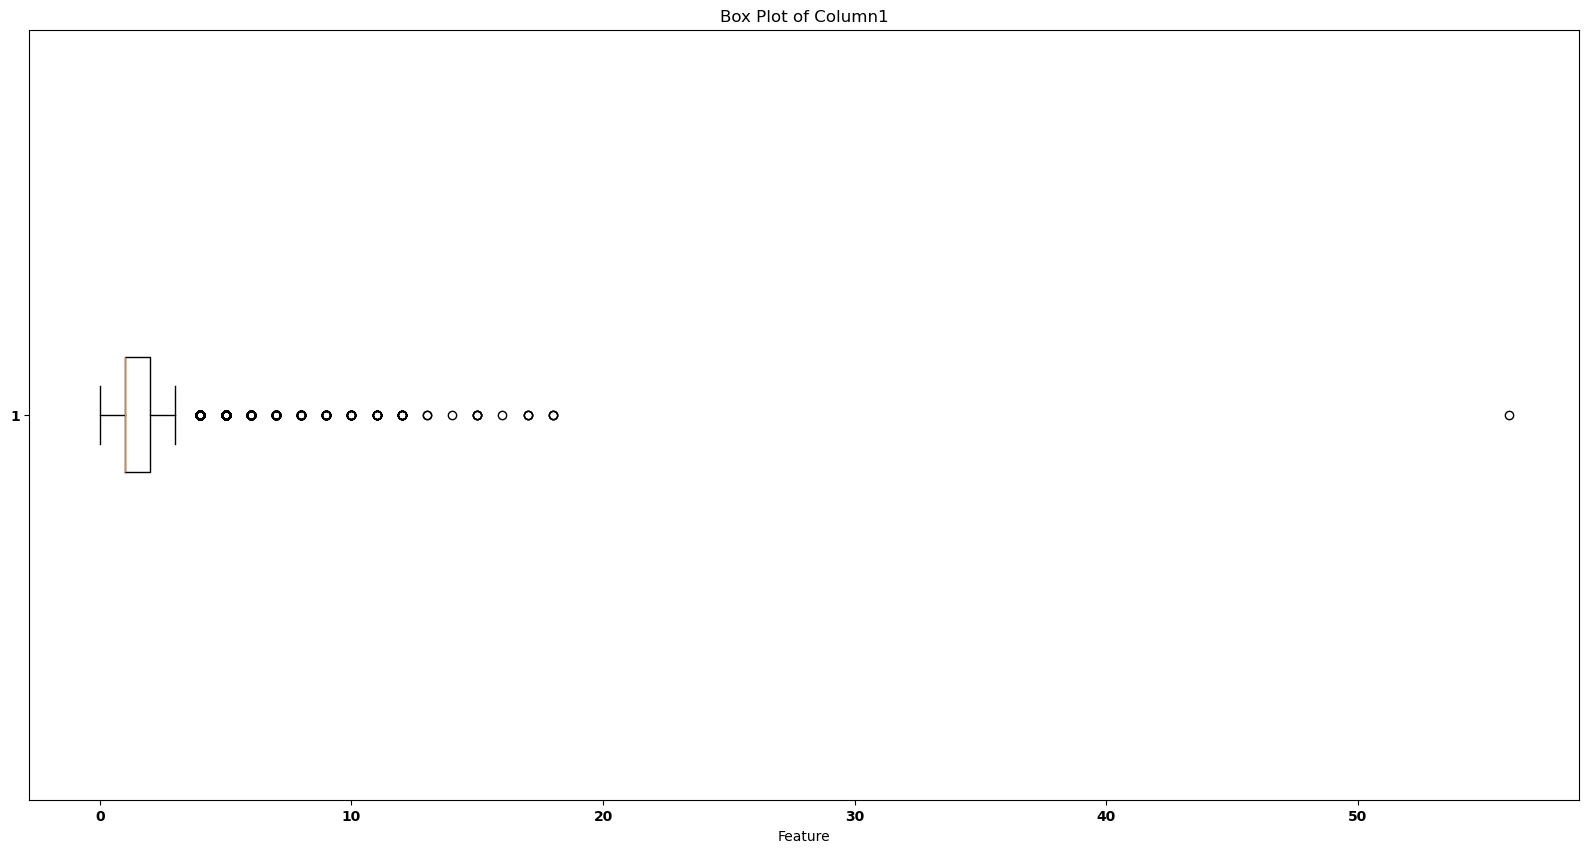

In [190]:
box_plot(cars_data['ex_owners'])

In [191]:
identify_outliers_iqr(cars_data['ex_owners'])

[-0.5, 3.5]

# Most cars have only one previous owner, while cars that have more than 5 are the minority

# Remove the outliers 

In [192]:
cars_data =  Remove_the_outliers(cars_data ,cars_data['ex_owners'] , 0 , 5 ) 

In [193]:
cars_data['ex_owners'].value_counts().sort_values()

5     207
4     342
0     656
3     697
2    1104
1    2878
Name: ex_owners, dtype: int64

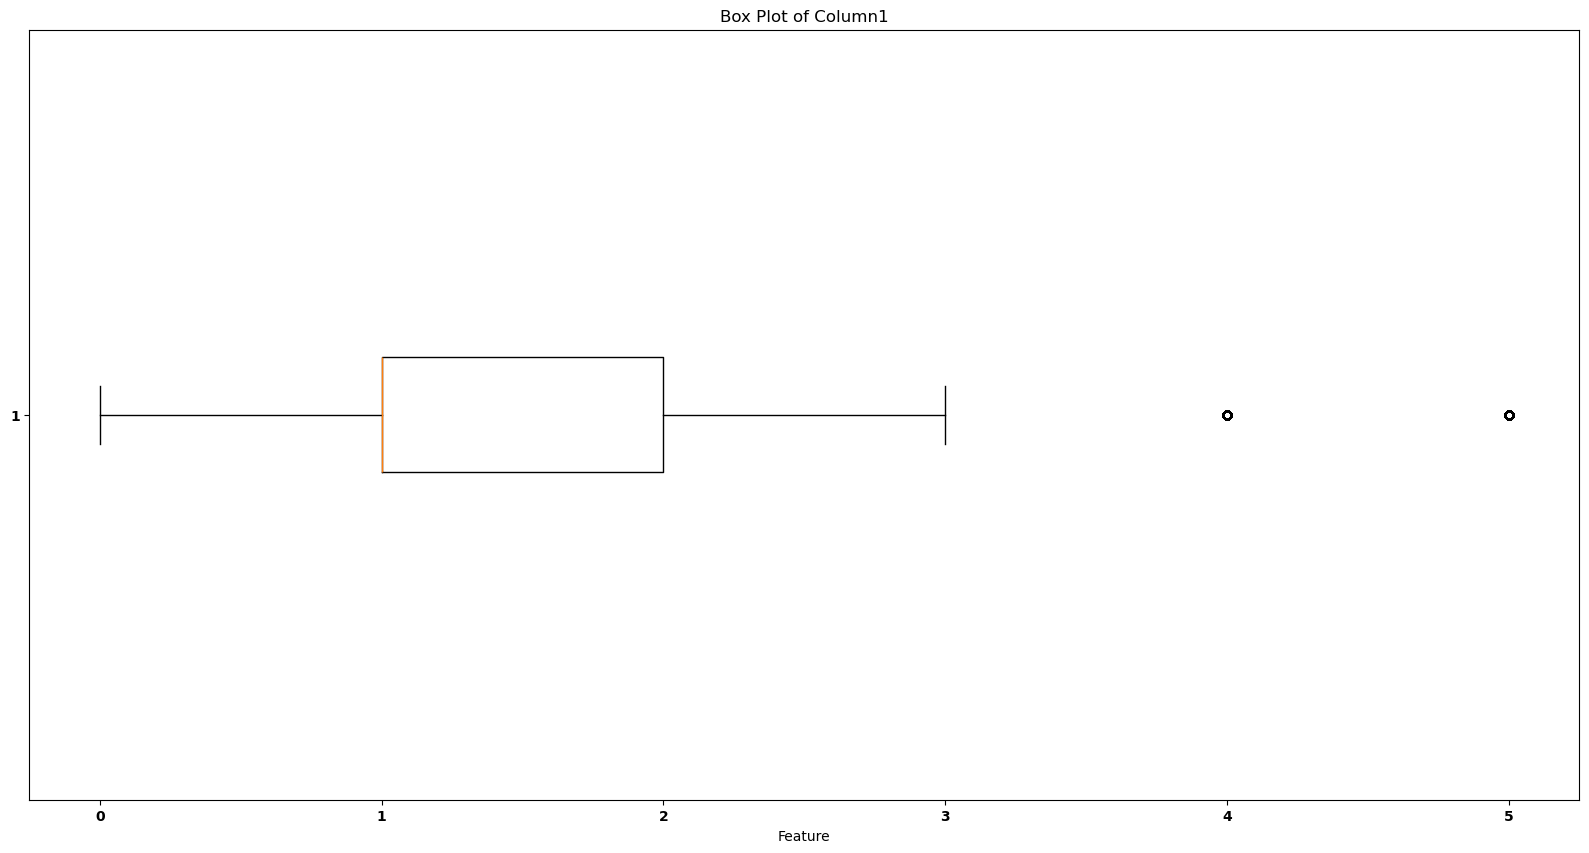

In [194]:
box_plot(cars_data['ex_owners'])

In [195]:
cars_data

,Name,model,Price,color,fuel_type,origin_car,car_license,lime_type,glass,motor_power,car_speedometer,passengers,ex_owners,Number_of_Additions,sunroof
0,كيا اوبتيما,موديل سنة 2014,100000 شيكل,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,75000,4+1,1,7.0,1.0
3,كيا سورينتو,موديل سنة 2007,60000 شيكل,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500.0,130000,7+1,2,7.0,1.0
4,هونداي افانتي,موديل سنة 2006,43500 شيكل,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,NaN,NaN,1,7.0,0.0
6,فيات 127,موديل سنة 1982,5500 شيكل,بيج,بنزين,خصوصي,فلسطينية,عادي,يدوي,906.0,شغال,4+1,0,2.0,0.0
7,بيجو 208,موديل سنة 2014,54000 شيكل,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200.0,38000,4+1,1,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983,مرسيدس C220,موديل سنة 2009,90000 شيكل,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200.0,180000,4+1,2,7.0,1.0
6984,نيسان كشكاي,موديل سنة 2014,95000 شيكل,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,NaN,4+1,1,6.0,1.0
6985,سكودا اوكتافيا,موديل سنة 2020,160000 شيكل,أبيض,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,25000,4+1,0,7.0,0.0
6986,سكودا سوبيرب,موديل سنة 2018,119000 شيكل,أسود,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,110,4+1,0,6.0,0.0


# motor_power

In [196]:
cars_data['motor_power'].dtype

dtype('float64')

# motor power data type is float64

# Covert the data type to int 

In [197]:
cars_data['motor_power'] = cars_data['motor_power'].astype('int64')

# identifty the outliers 

In [198]:
identify_outliers_iqr(cars_data['motor_power'])

[500.0, 2900.0]

# the normal range for the 'قوة الماتور ' is between [500,2900] 

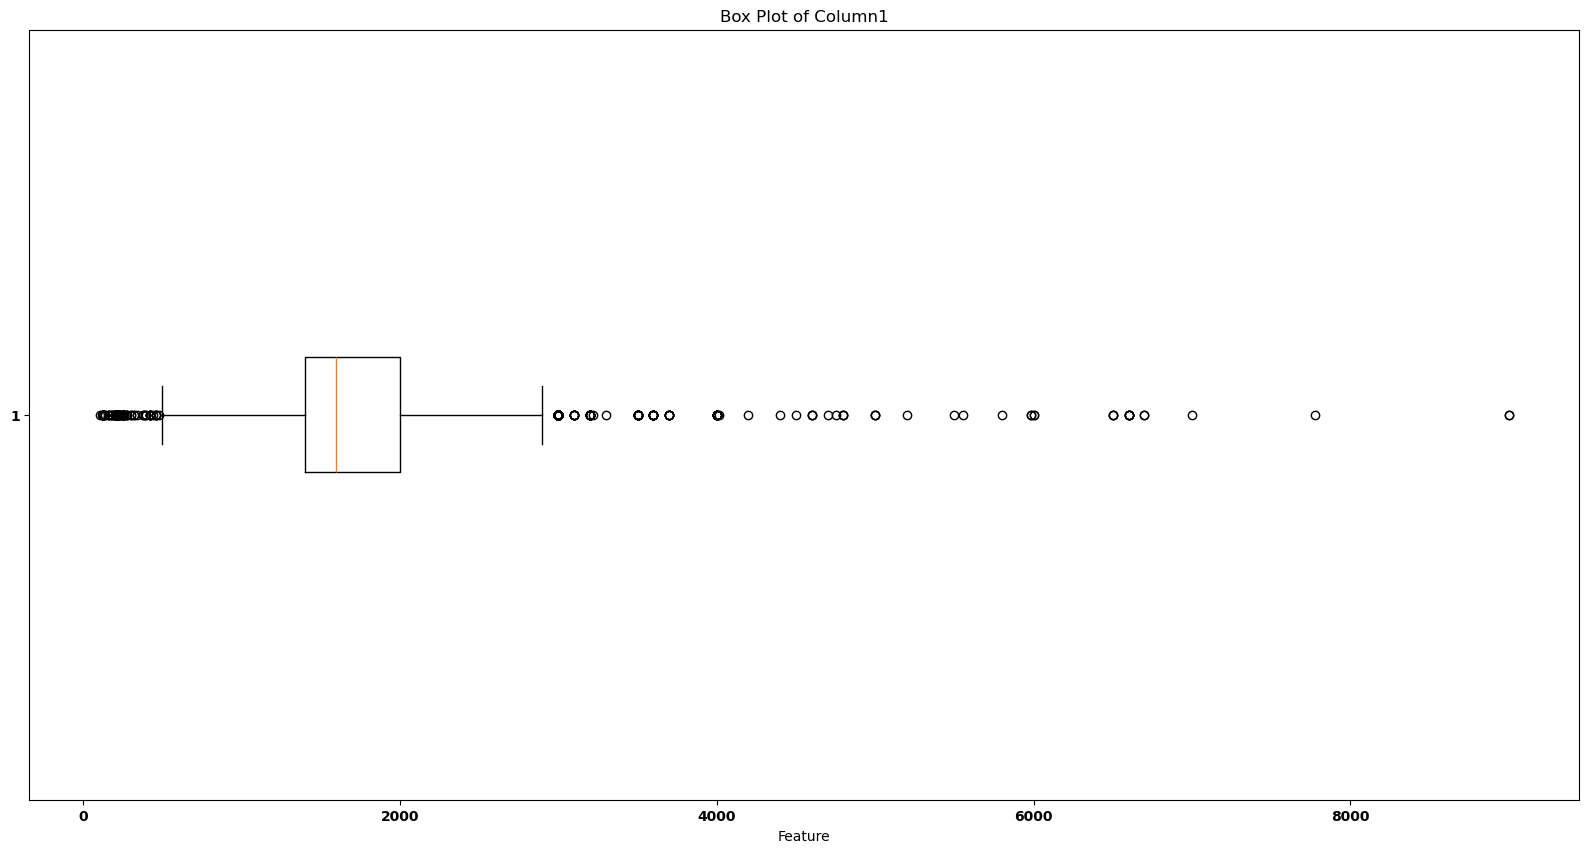

In [199]:
box_plot(cars_data['motor_power'])

# Remove the outliers from motor power

In [200]:
cars_data = Remove_the_outliers(cars_data ,cars_data['motor_power'], 500 , 3000 ) 

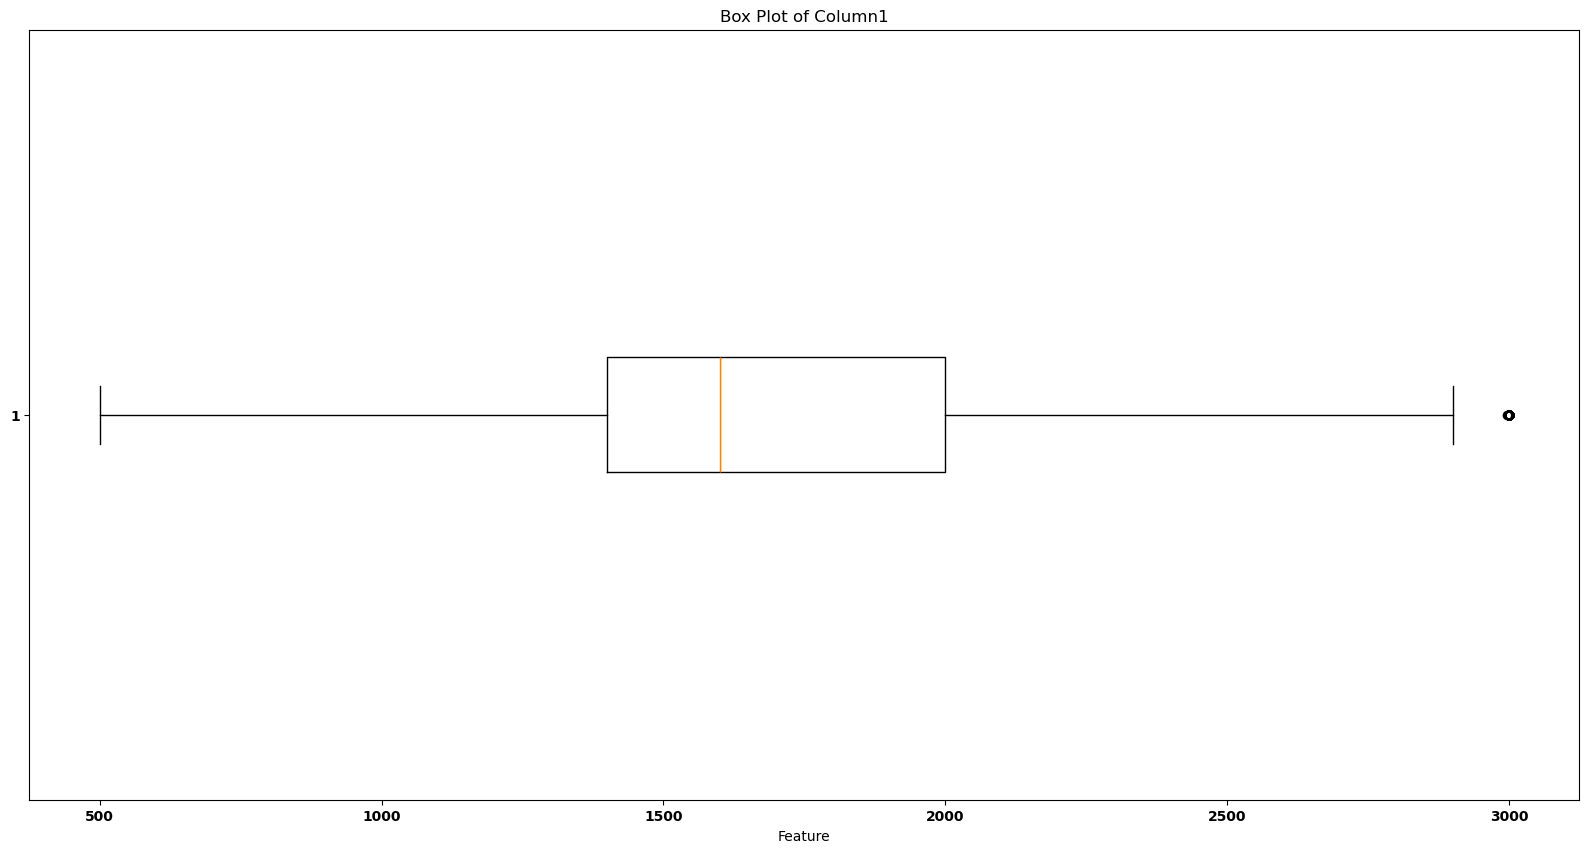

In [201]:
box_plot(cars_data['motor_power'])

In [202]:
cars_data

,Name,model,Price,color,fuel_type,origin_car,car_license,lime_type,glass,motor_power,car_speedometer,passengers,ex_owners,Number_of_Additions,sunroof
0,كيا اوبتيما,موديل سنة 2014,100000 شيكل,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,75000,4+1,1,7.0,1.0
3,كيا سورينتو,موديل سنة 2007,60000 شيكل,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,130000,7+1,2,7.0,1.0
4,هونداي افانتي,موديل سنة 2006,43500 شيكل,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,NaN,NaN,1,7.0,0.0
6,فيات 127,موديل سنة 1982,5500 شيكل,بيج,بنزين,خصوصي,فلسطينية,عادي,يدوي,906,شغال,4+1,0,2.0,0.0
7,بيجو 208,موديل سنة 2014,54000 شيكل,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,38000,4+1,1,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983,مرسيدس C220,موديل سنة 2009,90000 شيكل,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200,180000,4+1,2,7.0,1.0
6984,نيسان كشكاي,موديل سنة 2014,95000 شيكل,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,NaN,4+1,1,6.0,1.0
6985,سكودا اوكتافيا,موديل سنة 2020,160000 شيكل,أبيض,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,25000,4+1,0,7.0,0.0
6986,سكودا سوبيرب,موديل سنة 2018,119000 شيكل,أسود,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,110,4+1,0,6.0,0.0


# car_speedometer

# There are numeric values, strings, and symbols in this feature

In [203]:
 cars_data['car_speedometer'].unique()

array(['75000', '130000', nan, ..., '7000000', '110.00', '60479'],
      dtype=object)

In [204]:
#Trying to standardize the data type 

#delete the strings 
pattern = r'[أ-يا]'
rows_with_letters = cars_data['car_speedometer'].str.contains(pattern, na=False, regex=True)
num_rows_with_letters_before_drop = cars_data[rows_with_letters].shape[0]
num_rows_with_letters_before_drop

197

In [205]:
cars_data = cars_data[~rows_with_letters]

In [206]:
cars_data['car_speedometer'].unique()

array(['75000', '130000', nan, '38000', '١٢٣٤٥٦', '50000', '460000',
       '45000', '70000', '79000', '000', '210000', '1', '20000',
       '00000000000000000', '113000', '33000', '122,000',
       '00000000000000', '22000', '150000', '29000', '123457', '٢٥٠٠٠٠',
       '140000', '122000', '78000', '00000', '900000', '7', '00000000',
       '65000', '190', '-', '184000', '200', '30000', '295000', '60000',
       '43000', '71', '160000', '121000', '9900', '56000', '٢٦٠', '0000',
       '200000', '60', '124000', '100000', '90000', '000000', '99',
       '82000', '32123123', '166000', '275000', '82700', '120000',
       '500000', '18000000', '١٥٠', '80000', '87000', '110000', '350000',
       '55', '٤٠٠٠٠٠', '35000', '380000', '167000', '140', '160',
       '123456789', '94000', '90', '82', '51', '115', '300000', '٤١٠٠٠',
       '120', '196000', '١٢٠٠٠٠', '2000', '٠٠٠٠٠', '136000', '116000',
       '132', '54000', '40', '72000', '12345', '133000', '157', '71000',
       '132000', '47000'

In [207]:
df_copy = cars_data.copy()

In [208]:
arabic_to_english = {
    '٠': '0',
    '١': '1',
    '٢': '2',
    '٣': '3',
    '٤': '4',
    '٥': '5',
    '٦': '6',
    '٧': '7',
    '٨': '8',
    '٩': '9'
}

def convert_arabic_to_english(arabic_number):
    if pd.notna(arabic_number):
        for arabic, english in arabic_to_english.items():
            arabic_number = arabic_number.replace(arabic, english)
        
        # Remove non-numeric characters
        arabic_number = re.sub(r'[^0-9]', '0' , arabic_number)
        print(arabic_number)

    return arabic_number



In [209]:
cars_data['car_speedometer'] = cars_data['car_speedometer'].apply(convert_arabic_to_english)


75000
130000
38000
123456
50000
460000
45000
70000
79000
000
210000
1
20000
00000000000000000
113000
33000
1220000
00000000000000
22000
150000
29000
123457
250000
140000
122000
78000
00000
22000
900000
7
00000000
65000
190
0
184000
200
30000
295000
60000
43000
71
160000
121000
9900
56000
260
00000
0000
200000
60
140000
124000
100000
90000
000000
99
200000
82000
32123123
000000
166000
275000
60000
00000
50000
82700
120000
500000
18000000
150
100000
60000
80000
20000
87000
30000
160000
110000
22000
350000
75000
55
400000
35000
380000
210000
167000
140
75000
160
123456789
60000
00000
94000
90
20000
80000
200
50000
140000
82
000
38000
51
120000
115
300000
41000
120
000000
196000
20000
43000
120000
2000
00000
136000
116000
132
54000
40
78000
72000
160000
12345
133000
157
71000
130000
132000
000
47000
999855
52000
5
30
250000
65000
165500
40000
140000
256664
109000
100
39000
190000
113500
74000
2000000
91000
150000
620
65000
51000
1600
1111111
100000
220
490000
460000
48000
159000
190
000000

C:\Users\IMOE001\AppData\Local\Temp\ipykernel_2492\2773734295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_data['car_speedometer'] = cars_data['car_speedometer'].apply(convert_arabic_to_english)


In [210]:
cars_data['car_speedometer']  = pd.to_numeric(cars_data['car_speedometer'] , errors='coerce')

C:\Users\IMOE001\AppData\Local\Temp\ipykernel_2492\2068111395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_data['car_speedometer']  = pd.to_numeric(cars_data['car_speedometer'] , errors='coerce')


In [211]:
cars_data['car_speedometer'].dtype

dtype('float64')

In [212]:
 cars_data['car_speedometer'].unique()

array([7.50000000e+04, 1.30000000e+05,            nan, 3.80000000e+04,
       1.23456000e+05, 5.00000000e+04, 4.60000000e+05, 4.50000000e+04,
       7.00000000e+04, 7.90000000e+04, 0.00000000e+00, 2.10000000e+05,
       1.00000000e+00, 2.00000000e+04, 1.13000000e+05, 3.30000000e+04,
       1.22000000e+06, 2.20000000e+04, 1.50000000e+05, 2.90000000e+04,
       1.23457000e+05, 2.50000000e+05, 1.40000000e+05, 1.22000000e+05,
       7.80000000e+04, 9.00000000e+05, 7.00000000e+00, 6.50000000e+04,
       1.90000000e+02, 1.84000000e+05, 2.00000000e+02, 3.00000000e+04,
       2.95000000e+05, 6.00000000e+04, 4.30000000e+04, 7.10000000e+01,
       1.60000000e+05, 1.21000000e+05, 9.90000000e+03, 5.60000000e+04,
       2.60000000e+02, 2.00000000e+05, 6.00000000e+01, 1.24000000e+05,
       1.00000000e+05, 9.00000000e+04, 9.90000000e+01, 8.20000000e+04,
       3.21231230e+07, 1.66000000e+05, 2.75000000e+05, 8.27000000e+04,
       1.20000000e+05, 5.00000000e+05, 1.80000000e+07, 1.50000000e+02,
      

In [213]:
cars_data['car_speedometer'].isna().sum()

1656

# there is a missing value in this feature . 

# Identify outliers 

In [214]:
lowest , highest = identify_outliers_iqr(cars_data['car_speedometer'])
print(lowest , highest)

-167000.0 308200.0


In [215]:
number_of_outliers = cars_data[(cars_data['car_speedometer']  < lowest) | (cars_data['car_speedometer'] > highest)]
len(number_of_outliers)

226

In [216]:
#test = cars_data.copy()

# Fill the missing  with median 

In [217]:
cars_data['car_speedometer'].fillna(cars_data['car_speedometer'].median(), inplace=True)

C:\Users\IMOE001\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [218]:
Q1 = cars_data['car_speedometer'].quantile(0.25)
Q3 = cars_data['car_speedometer'].quantile(0.85)
IQR = Q3 - Q1
lower_bound_in_speedometer = Q1 - 1.5 * IQR
upper_bound_in_speedometer = Q3 + 1.5 * IQR
lower_bound_in_speedometer , upper_bound_in_speedometer

(-125000.0, 315000.0)

In [219]:
cars_data = cars_data[(cars_data['car_speedometer'] > lower_bound_in_speedometer) & (cars_data['car_speedometer'] < upper_bound_in_speedometer ) ]

In [220]:
cars_data['car_speedometer'] .max()

308654.0

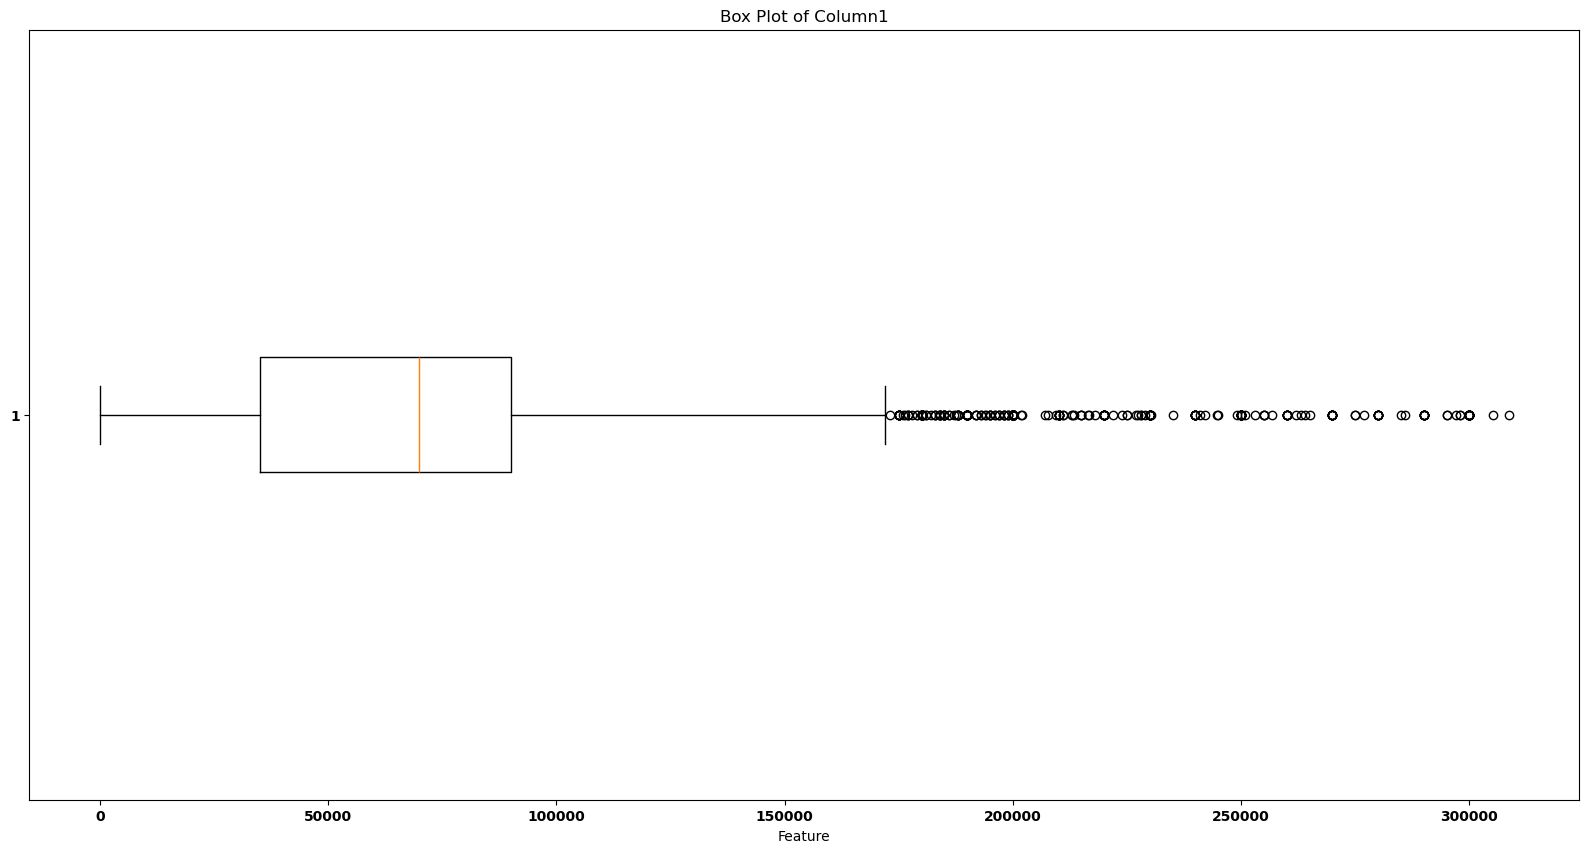

In [221]:
box_plot(cars_data['car_speedometer'])

In [222]:
cars_data.reset_index()

,index,Name,model,Price,color,fuel_type,origin_car,car_license,lime_type,glass,motor_power,car_speedometer,passengers,ex_owners,Number_of_Additions,sunroof
0,0,كيا اوبتيما,موديل سنة 2014,100000 شيكل,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,75000.0,4+1,1,7.0,1.0
1,3,كيا سورينتو,موديل سنة 2007,60000 شيكل,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,130000.0,7+1,2,7.0,1.0
2,4,هونداي افانتي,موديل سنة 2006,43500 شيكل,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,70000.0,NaN,1,7.0,0.0
3,7,بيجو 208,موديل سنة 2014,54000 شيكل,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,38000.0,4+1,1,5.0,0.0
4,8,بي ام دبليو x3,موديل سنة 2015,205000 شيكل,أسود,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,70000.0,5+1,0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5244,6983,مرسيدس C220,موديل سنة 2009,90000 شيكل,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200,180000.0,4+1,2,7.0,1.0
5245,6984,نيسان كشكاي,موديل سنة 2014,95000 شيكل,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,70000.0,4+1,1,6.0,1.0
5246,6985,سكودا اوكتافيا,موديل سنة 2020,160000 شيكل,أبيض,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,25000.0,4+1,0,7.0,0.0
5247,6986,سكودا سوبيرب,موديل سنة 2018,119000 شيكل,أسود,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,110.0,4+1,0,6.0,0.0


In [223]:
df = cars_data.copy()

# Now the range of value in the car_speedometer is between [0,333000]

# price


# The data type is object

In [224]:
cars_data['Price'].dtype

dtype('O')

In [225]:
cars_data['Price'] = cars_data ['Price'].astype(str).str.replace('شيكل', '')



In [226]:
cars_data.rename(columns={'Price' : 'Price(NIS)'}, inplace=True)

In [227]:
cars_data['Price(NIS)'] .isna().sum()

0

# There is no missing value in the price 

In [228]:
cars_data['Price(NIS)'] = cars_data['Price(NIS)'].astype('int64')

In [229]:
cars_data['Price(NIS)'].dtype

dtype('int64')

# Identify the outliers in Price

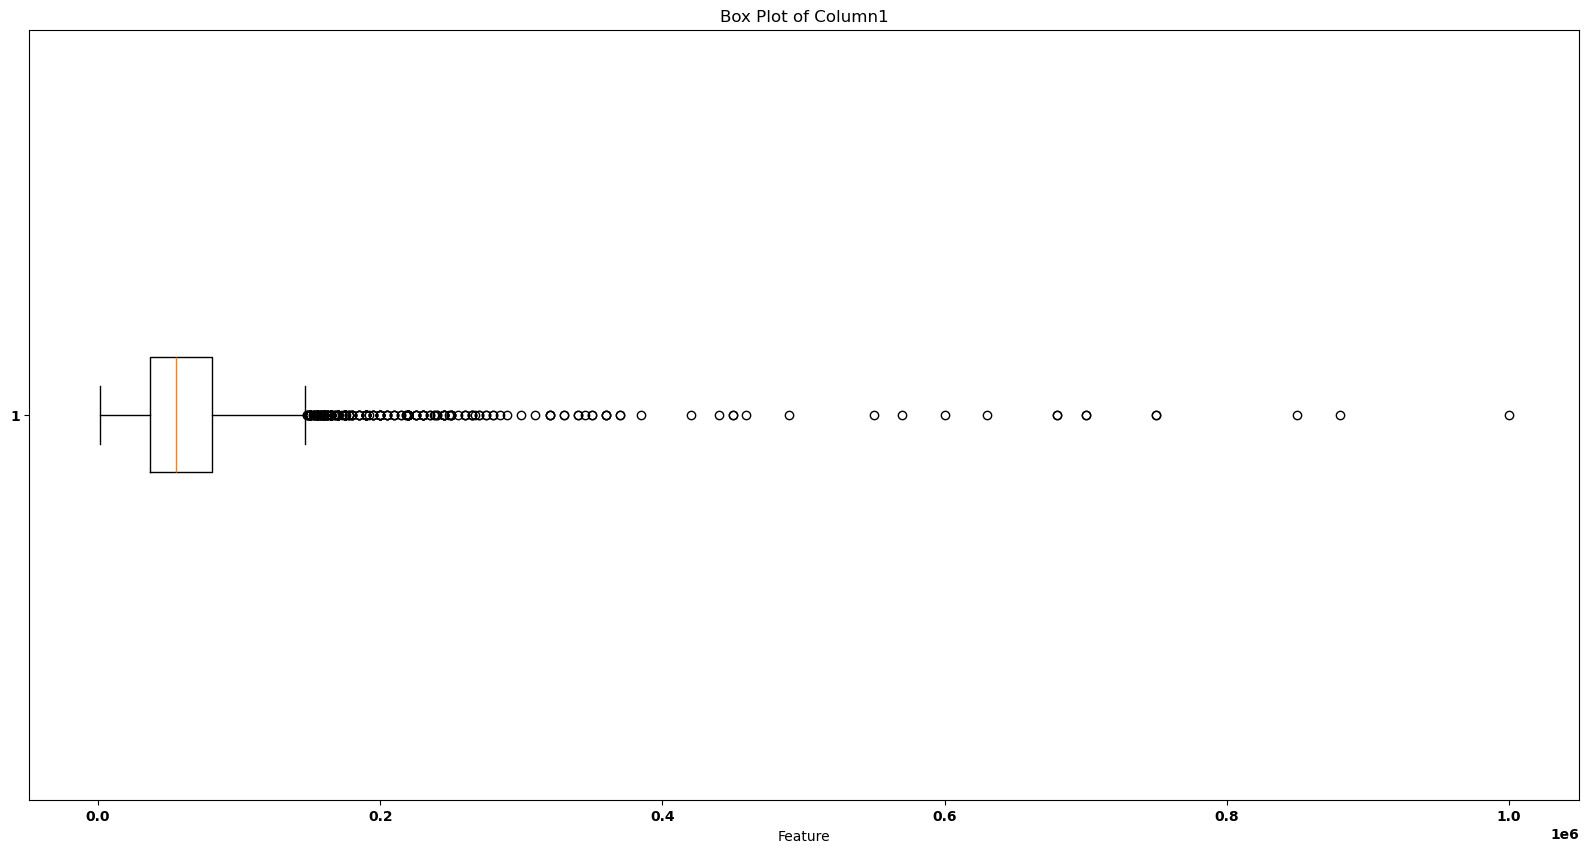

In [230]:
box_plot(cars_data['Price(NIS)'])

In [231]:
lower_bound, upper_bound   = identify_outliers_iqr(cars_data['Price(NIS)'])
lower_bound, upper_bound 

(-29000.0, 147000.0)

In [232]:
num_outliers = ((cars_data['Price(NIS)'] < lower_bound) | (cars_data['Price(NIS)'] > upper_bound)).sum()
print(f"Number of outliers in 'Price(NIS)': {num_outliers}")

Number of outliers in 'Price(NIS)': 255


In [233]:
 cars_data[cars_data['Price(NIS)'] < 5000][0:50]
#its fine with this prices , the price sutible with modle and speedometer . 

,Name,model,Price(NIS),color,fuel_type,origin_car,car_license,lime_type,glass,motor_power,car_speedometer,passengers,ex_owners,Number_of_Additions,sunroof
24,هوندا اكورد,موديل سنة 1997,2600,ذهبي,بنزين,خصوصي,نمرة صفراء,اوتوماتيك,الكتروني,1800,210000.0,4+١,3,6.0,1.0
25,اوبل اسكونا,موديل سنة 1967,1800,أزرق,بنزين,خصوصي,فلسطينية,عادي,يدوي,1200,1.0,4+1,2,2.0,0.0
103,فولكسفاجن جولف,موديل سنة 1982,4000,خمري,بنزين,تأجير,فلسطينية,عادي,الكتروني,1300,70000.0,NaN,1,0.0,0.0
111,ستروين كسارا,موديل سنة 2000,1900,سكني,بنزين,خصوصي,نمرة صفراء,اوتوماتيك,الكتروني,1600,0.0,5+1,1,6.0,0.0
275,بيجو 205,موديل سنة 1998,3500,أحمر,بنزين,خصوصي,نمرة صفراء,عادي,الكتروني,1400,70000.0,NaN,2,3.0,0.0
335,ميتسوبيشي كاريزما,موديل سنة 1999,1500,أبيض,بنزين,خصوصي,نمرة صفراء,اوتوماتيك,الكتروني,1600,190.0,4+1,2,4.0,0.0
454,سوبارو نملة,موديل سنة 1982,3000,أبيض,بنزين,خصوصي,فلسطينية,عادي,يدوي,1600,0.0,4+1,5,1.0,0.0
480,فولكسفاجن جولف,موديل سنة 1998,3000,سكني,بنزين,خصوصي,نمرة صفراء,اوتوماتيك,الكتروني,2000,0.0,4+1,0,7.0,1.0
516,فيات 127,موديل سنة 1980,3500,أبيض,بنزين,خصوصي,فلسطينية,عادي,يدوي,900,70000.0,NaN,1,2.0,0.0
590,رينو R9,موديل سنة 1983,4000,رصاصي,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1400,11111.0,١+٤,5,3.0,0.0


In [234]:
 cars_data[cars_data['Price(NIS)'] > upper_bound ][0:50]
#Unsuitable or unnatural prices. 

,Name,model,Price(NIS),color,fuel_type,origin_car,car_license,lime_type,glass,motor_power,car_speedometer,passengers,ex_owners,Number_of_Additions,sunroof
8,بي ام دبليو x3,موديل سنة 2015,205000,أسود,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,70000.0,5+1,0,7.0,1.0
10,مرسيدس C200,موديل سنة 2014,230000,أبيض,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,50000.0,4+1,1,7.0,1.0
95,بي ام دبليو X3,موديل سنة 2014,215000,أسود,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,43000.0,4+1,1,7.0,1.0
141,مازدا 6,موديل سنة 2015,170000,خمري,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2500,50000.0,4+1,1,7.0,1.0
166,مرسيدس C250,موديل سنة 2015,175000,فيراني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2500,30000.0,NaN,0,7.0,1.0
202,فيات دوبلو,موديل سنة 2009,550000,بني,ديزل,خصوصي,فلسطينية,عادي,الكتروني,1900,200.0,6±١,1,6.0,0.0
365,اودي A6,موديل سنة 2013,156000,أسود ميتالك,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,3000,70000.0,NaN,0,7.0,1.0
417,بي ام دبليو 528,موديل سنة 2014,215000,أبيض,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,8000.0,4+1,1,7.0,0.0
419,كيا سورينتو,موديل سنة 2015,168000,أبيض,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200,70000.0,6+1,1,7.0,1.0
436,بي ام دبليو 520,موديل سنة 2014,190000,فيراني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,76000.0,4+1,1,7.0,1.0


# Remove the outliers 

In [235]:
cars_data = Remove_the_outliers(cars_data , cars_data['Price(NIS)'] , 0 , 155000.0 ) 

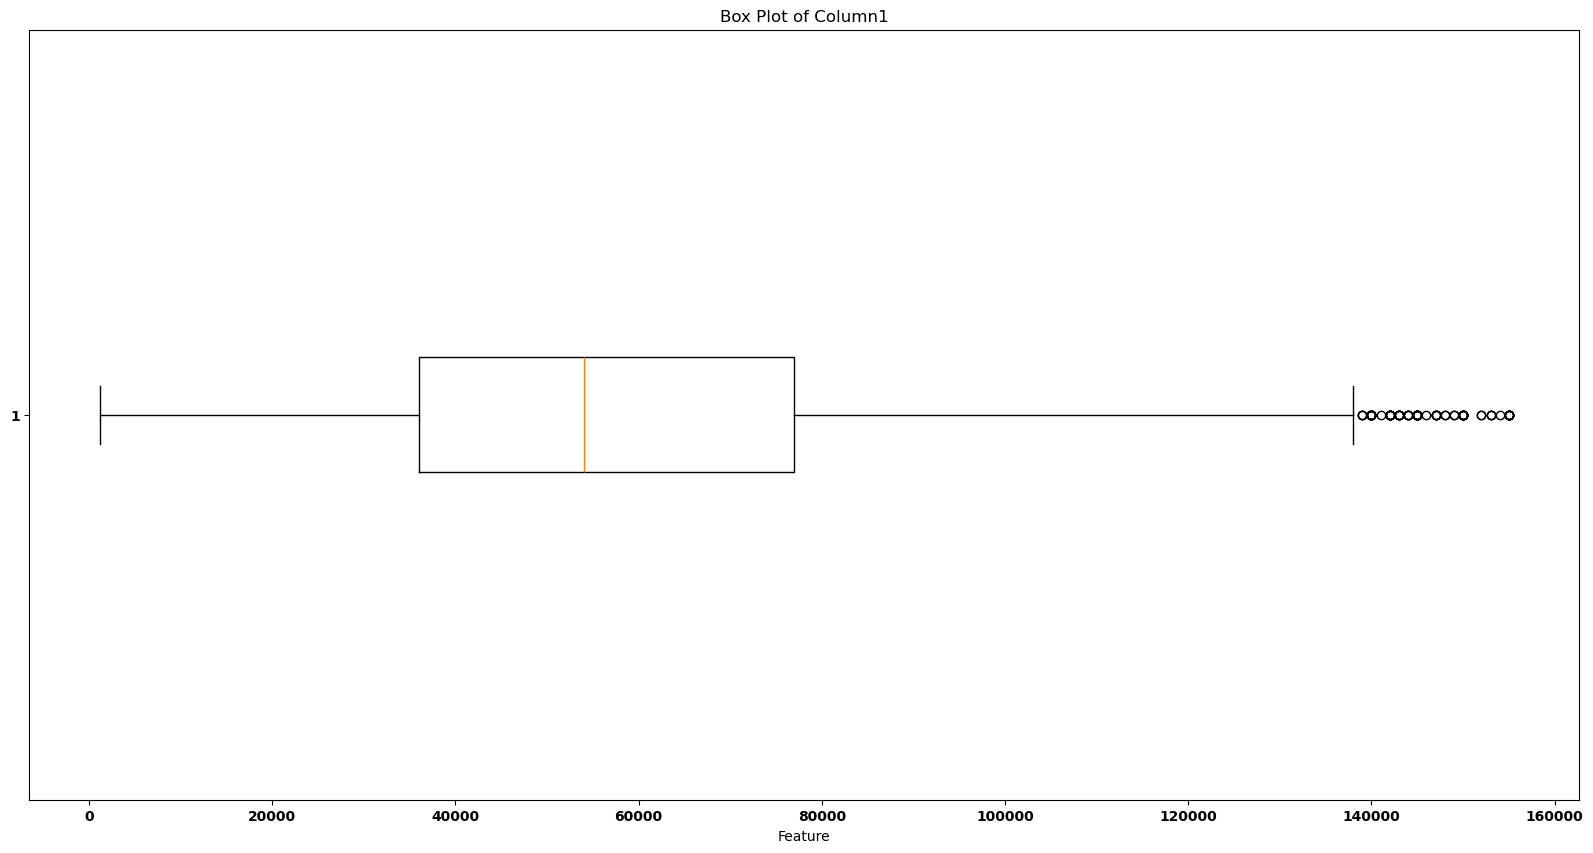

In [236]:
box_plot(cars_data['Price(NIS)'])

In [237]:
cars_data['Price(NIS)'].dtype

dtype('int64')

In [238]:
cars_data

,Name,model,Price(NIS),color,fuel_type,origin_car,car_license,lime_type,glass,motor_power,car_speedometer,passengers,ex_owners,Number_of_Additions,sunroof
0,كيا اوبتيما,موديل سنة 2014,100000,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,75000.0,4+1,1,7.0,1.0
3,كيا سورينتو,موديل سنة 2007,60000,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,130000.0,7+1,2,7.0,1.0
4,هونداي افانتي,موديل سنة 2006,43500,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,70000.0,NaN,1,7.0,0.0
7,بيجو 208,موديل سنة 2014,54000,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,38000.0,4+1,1,5.0,0.0
9,اوبل كورسا,موديل سنة 2015,65000,بترولي,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1400,123456.0,٤+١,1,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,سيت ارونا,موديل سنة 2021,115000,أحمر,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1000,20000.0,4+1,0,7.0,0.0
6982,فورد فيستا,موديل سنة 2012,30000,سكني,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1250,10000.0,4+1,3,3.0,0.0
6983,مرسيدس C220,موديل سنة 2009,90000,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200,180000.0,4+1,2,7.0,1.0
6984,نيسان كشكاي,موديل سنة 2014,95000,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,70000.0,4+1,1,6.0,1.0


In [239]:
cars_data['Price(NIS)'].min()

1200

In [240]:
cars_data['Price(NIS)'].max()

155000

# Modle feature

In [241]:
cars_data['model'].dtype

dtype('O')

In [242]:
cars_data['model'].isna().sum()

0

# There is No missing data 

# Convert the data type 

In [243]:
cars_data['model'] = cars_data ['model'].astype(str).str.replace('موديل سنة', '')
cars_data['model'] = cars_data['model'].astype('int64')


In [244]:
cars_data['model'].dtype

dtype('int64')

In [245]:
missing_values_in_the_features = cars_data.isnull().sum()
missing_values_in_the_features

Name                     0
model                    0
Price(NIS)               0
color                    0
fuel_type                0
origin_car               0
car_license              0
lime_type                0
glass                    0
motor_power              0
car_speedometer          0
passengers             619
ex_owners                0
Number_of_Additions      0
sunroof                  0
dtype: int64

In [246]:
# Filling with most occurring Values
#cars_data = cars_data.apply(lambda x: x.fillna(x.value_counts().index[0]))


In [247]:
cars_data['model'].value_counts().sort_values()

1972      1
1977      1
1968      1
1970      1
1967      1
1975      1
1974      1
1973      2
1978      2
1979      4
2021      5
1980      5
1991      6
1994      7
1981      7
1989     10
1993     10
1990     12
1992     21
1988     24
1995     25
1985     25
1984     27
1982     32
2020     36
1996     36
1987     37
1986     41
1983     50
1998     61
1997     68
2004     75
2001     75
2003     85
2019    104
2000    104
2002    105
1999    130
2005    130
2018    159
2009    166
2010    181
2017    217
2011    236
2006    245
2007    259
2013    269
2012    279
2008    372
2016    402
2015    425
2014    454
Name: model, dtype: int64

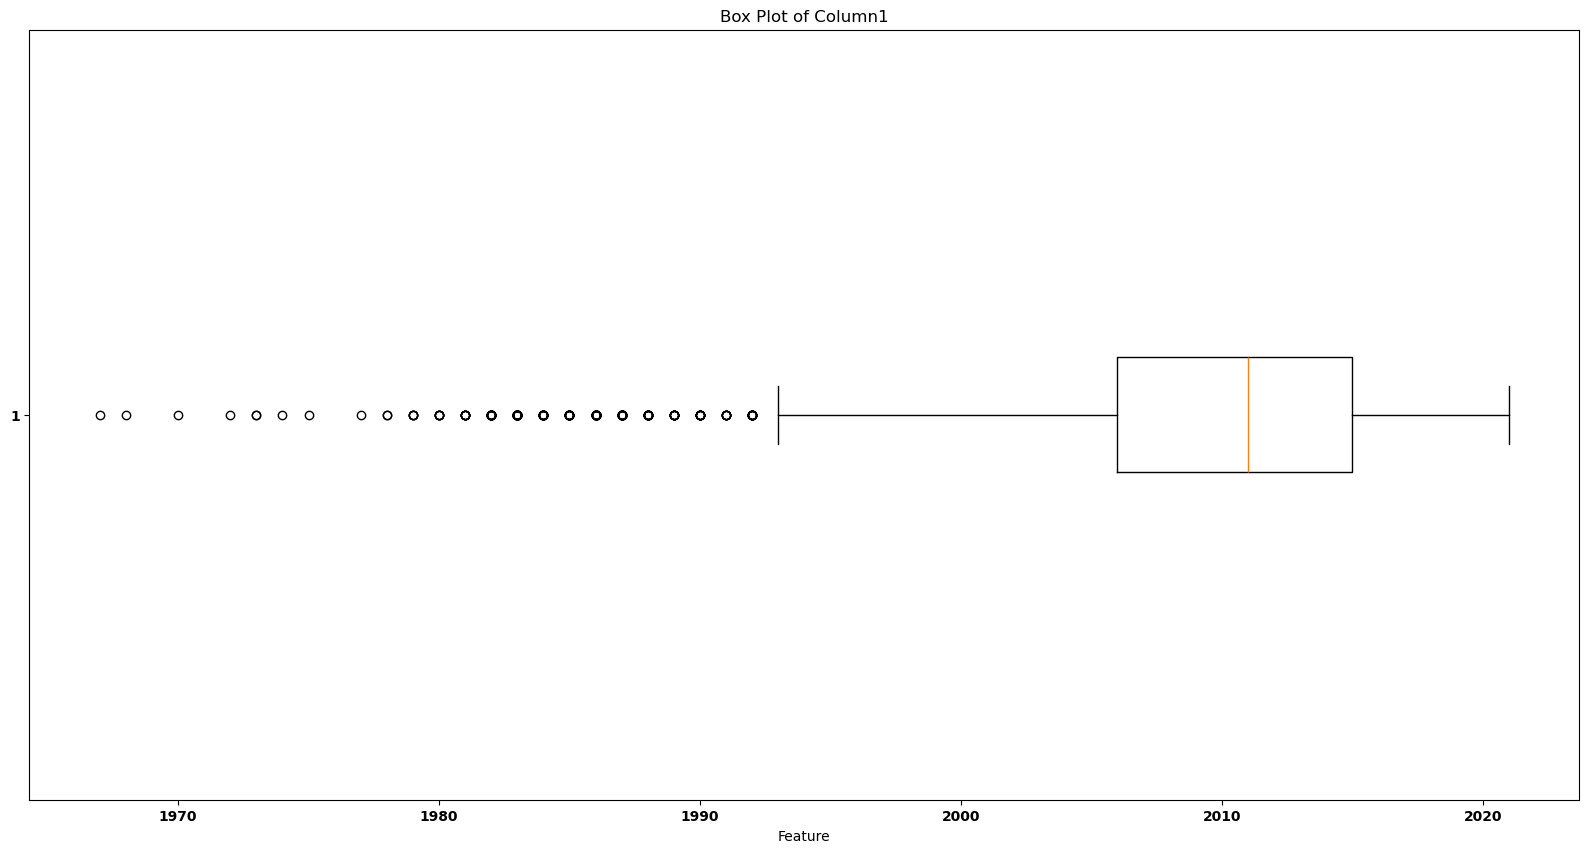

In [248]:
box_plot(cars_data['model'])

In [249]:
 cars_data[cars_data['model'] < 1995][0:50]
#this data can be consider normal data not outliers 

,Name,model,Price(NIS),color,fuel_type,origin_car,car_license,lime_type,glass,motor_power,car_speedometer,passengers,ex_owners,Number_of_Additions,sunroof
25,اوبل اسكونا,1967,1800,أزرق,بنزين,خصوصي,فلسطينية,عادي,يدوي,1200,1.0,4+1,2,2.0,0.0
40,اوبل كاديت,1982,17500,أبيض عاجي,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1300,0.0,4+1,0,4.0,0.0
57,رينو R9,1983,11000,أبيض عاجي,بنزين,خصوصي,فلسطينية,عادي,يدوي,1100,70000.0,NaN,1,3.0,0.0
75,اوبل كاديت,1986,23000,أحمر,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1500,70000.0,4+1,1,4.0,0.0
79,اوبل كاديت,1984,13000,أبيض,بنزين,خصوصي,فلسطينية,عادي,يدوي,1400,184000.0,4+1,5,5.0,0.0
82,اوبل اسكونا,1984,6000,أبيض,بنزين,خصوصي,فلسطينية,عادي,يدوي,1300,200.0,5+1,5,2.0,0.0
103,فولكسفاجن جولف,1982,4000,خمري,بنزين,تأجير,فلسطينية,عادي,الكتروني,1300,70000.0,NaN,1,0.0,0.0
108,رينو R9,1983,7000,كحلي,بنزين,خصوصي,فلسطينية,عادي,يدوي,1100,70000.0,4+1,1,0.0,0.0
110,بيجو 305,1984,7500,أبيض عاجي,بنزين,خصوصي,فلسطينية,عادي,يدوي,1300,0.0,4+1,0,2.0,0.0
113,بي ام دبليو 520,1994,25000,كحلي,بنزين,خصوصي,فلسطينية,عادي,الكتروني,2000,200000.0,4+1,5,7.0,1.0


# passengers Feature

In [250]:
cars_data['passengers'].dtype

dtype('O')

In [251]:
cars_data['passengers'].isna().sum()

619

# There is missing value in this feature 

In [252]:
cars_data['passengers'].unique()

array(['4+1', '7+1', nan, '٤+١', '4+١', '6+1', '٧', '7,+ 1', '5+1', '7:1',
       '1+7', '6+١', '+1', '22', '١+٤', '٥+١', '٧+1', '7.1', '7 =1',
       '٧+١', '6x1', '1+٤', '2+1', '2/1', '8+1', '٦+١', '2', '4+2',
       '4\\١', '3+1', '1', 'اكثر من 10', '9+1', '1+1'], dtype=object)

# mapping to standrize the format  

In [253]:
cars_data['passengers'].unique()
noisy_data_in_passengers = []

mapping_for_passengers  =  { 
  '٤+١' : '4+1' ,
  '4+١' : '4+1' , 
  '١+٤' : '4+1' , 
  '1+٤' : '4+1' , 
  '4\\١': '4+1', 
  '7,+ 1': '7+1',
  '7:1' : '7+1' ,
  '7.1' : '7+1' , 
  '٧+1' :  '7+1' , 
  '1+7' : '7+1' , 
  '7 =1': '7+1' , 
  '٧+١' :  '7+1',  
  '6+١' : '6+1' ,
  '6x1' : '6+1' , 
  '٦+١': '6+1' , 
  '٨+١' : '8+1' ,
  'nan' : 'NaN',
  '6±١': '6+1' , 
  '٥+١'  : '5+1' , 
  '4+2' : '5+1' ,
} 
cars_data['passengers'].unique()


array(['4+1', '7+1', nan, '٤+١', '4+١', '6+1', '٧', '7,+ 1', '5+1', '7:1',
       '1+7', '6+١', '+1', '22', '١+٤', '٥+١', '٧+1', '7.1', '7 =1',
       '٧+١', '6x1', '1+٤', '2+1', '2/1', '8+1', '٦+١', '2', '4+2',
       '4\\١', '3+1', '1', 'اكثر من 10', '9+1', '1+1'], dtype=object)

In [254]:
cars_data['passengers'] =  cars_data['passengers'].replace(mapping_for_passengers)

In [255]:
cars_data['passengers'].unique()

array(['4+1', '7+1', nan, '6+1', '٧', '5+1', '+1', '22', '2+1', '2/1',
       '8+1', '2', '3+1', '1', 'اكثر من 10', '9+1', '1+1'], dtype=object)

In [256]:
The_noisy_in_passengers = [ '4+2', '3+1', '1', 'اكثر من 10', '9+1', '1+1' , '٧' ,  '+1', '1+2', '2/1' , '2' , '22']

In [257]:
cars_data = cars_data[~cars_data['passengers'].isin(The_noisy_in_passengers)]

In [258]:
cars_data['passengers'].unique()

array(['4+1', '7+1', nan, '6+1', '5+1', '2+1', '8+1'], dtype=object)

In [259]:
cars_data['passengers'].value_counts().sort_values()

8+1      12
2+1      44
5+1      68
7+1     124
6+1     380
4+1    3702
Name: passengers, dtype: int64

In [260]:
df = cars_data.copy()


# Filling the missing data in passengers using Knn algorithem 

In [261]:
def impute_non_numeric(neighbors):
    # Extract the 'passengers' values from the neighbors
    passengers_values = neighbors['passengers'].dropna()
    print( 'Hello' , passengers_values)
    # Use mode to find the most common category
    if not passengers_values.empty:
        return mode(passengers_values)
#else all the neighbors , there passengers_values is missing .

   
numeric_features = df[['model', 'Price(NIS)', 'motor_power', 'car_speedometer']]
non_numeric_feature = 'passengers'

missing_indices = df[df[non_numeric_feature].isnull()].index
knn_model = NearestNeighbors(n_neighbors = 5)
knn_model.fit(numeric_features)

for index in missing_indices:
    print(index)
    features_to_impute = numeric_features.loc[index].values.reshape(1, -1)
    print(features_to_impute)
    distances, indices = knn_model.kneighbors(features_to_impute)
    print(distances, indices)
    neighbors = df.iloc[indices[0]]
    print(neighbors['passengers'])
    df.at[index, non_numeric_feature] = impute_non_numeric(neighbors)


C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X

4
[[ 2006. 43500.  1600. 70000.]]
[[  0.         350.09141663 500.         500.         500.        ]] [[   2 1543 1945  354 1093]]
4       NaN
2260    NaN
2832    4+1
548     4+1
1646    4+1
Name: passengers, dtype: object
Hello 2832    4+1
548     4+1
1646    4+1
Name: passengers, dtype: object
12
[[ 2014. 59000.  1600. 70000.]]
[[  0.           2.         200.         200.02249873 400.00125   ]] [[   5 1687  159 3434 3681]]
12      NaN
2471    4+1
260     NaN
4836    4+1
5195    4+1
Name: passengers, dtype: object
Hello 2471    4+1
4836    4+1
5195    4+1
Name: passengers, dtype: object
19
[[ 2012. 55000.  1200. 70000.]]
[[0. 2. 4. 4. 5.]] [[   9 1418 2832 4925 4665]]
19      NaN
2083    4+1
4004    4+1
6953    4+1
6577    4+1
Name: passengers, dtype: object
Hello 2083    4+1
4004    4+1
6953    4+1
6577    4+1
Name: passengers, dtype: object
22
[[ 2011. 55000.  1600.     0.]]
[[ 0.  1.  3.  3. 10.]] [[  11 1732 2740 4204 4310]]
22      NaN
2534    4+1
3886    4+1
5951    4+1
6089  

C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X

[[0. 1. 1. 1. 1.]] [[ 111 3784 1545  222 2496]]
184     NaN
5360    4+1
2263    4+1
350     NaN
3550    4+1
Name: passengers, dtype: object
Hello 5360    4+1
2263    4+1
3550    4+1
Name: passengers, dtype: object
203
[[ 1983.  6000.  1300. 70000.]]
[[  0.         300.00666659 400.         400.00125    500.        ]] [[ 122 1142 1359 1714 1051]]
203     NaN
1712    4+1
2004    4+1
2506    4+1
1589    4+1
Name: passengers, dtype: object
Hello 1712    4+1
2004    4+1
2506    4+1
1589    4+1
Name: passengers, dtype: object
205
[[ 1988.  8000.  1500. 70000.]]
[[  0.         101.78899744 400.00499997 500.00399998 509.91764041]] [[ 124 2558 3957 3397 3715]]
205     NaN
3638    NaN
5595    NaN
4783    4+1
5244    4+1
Name: passengers, dtype: object
Hello 4783    4+1
5244    4+1
Name: passengers, dtype: object
207
[[ 2003. 52000.  1600. 70000.]]
[[0. 0. 4. 5. 8.]] [[1120  126  645 2744 4484]]
1685    4+1
207     NaN
1023    4+1
3890    4+1
6319    4+1
Name: passengers, dtype: object
Hello 1685

C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X

[[  0.          64.00781202 176.01136327 200.04999375 241.86153063]] [[ 319 4859 4085 2863 3314]]
499     NaN
6866    4+1
5774    4+1
4040    4+1
4657    4+1
Name: passengers, dtype: object
Hello 6866    4+1
5774    4+1
4040    4+1
4657    4+1
Name: passengers, dtype: object
500
[[ 2007. 40000.  1600. 70000.]]
[[0. 0. 0. 1. 1.]] [[1564 3527  320 2262 2446]]
2294    4+1
4976    NaN
500     NaN
3248    4+1
3484    4+1
Name: passengers, dtype: object
Hello 2294    4+1
3248    4+1
3484    4+1
Name: passengers, dtype: object
509
[[2.014e+03 6.500e+04 1.400e+03 4.800e+01]]
[[ 0.          4.         10.04987562 31.01612484 42.        ]] [[ 326 1086 1257 2400 2027]]
509     NaN
1638    NaN
1870    4+1
3427    4+1
2940    4+1
Name: passengers, dtype: object
Hello 1870    4+1
3427    4+1
2940    4+1
Name: passengers, dtype: object
510
[[2.015e+03 6.300e+04 1.200e+03 6.000e+01]]
[[  0.           3.16227766 200.67884791 404.47620449 430.82362981]] [[ 327 1887 4297 3247 2965]]
510     NaN
2755    4

C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X

[[   0.         2157.705726   2184.03319572 2315.17083603 2828.42730152]] [[ 495 2304  821 4190 2141]]
781     NaN
3301    4+1
1274    4+1
5928    NaN
3091    4+1
Name: passengers, dtype: object
Hello 3301    4+1
1274    4+1
3091    4+1
Name: passengers, dtype: object
790
[[  2008.  39999.   1600. 119000.]]
[[   0.         1077.04085345 1413.50698619 1535.59434748 2000.0025    ]] [[ 498  808 2737 3435 4647]]
790     NaN
1254    6+1
3882    4+1
4837    4+1
6557    4+1
Name: passengers, dtype: object
Hello 1254    6+1
3882    4+1
4837    4+1
6557    4+1
Name: passengers, dtype: object
796
[[ 1999. 22000.  1900. 70000.]]
[[  0.           4.           7.         100.00499988 100.019998  ]] [[ 502 4431 4789 2269  445]]
796     NaN
6255    6+1
6759    4+1
3257    4+1
685     4+1
Name: passengers, dtype: object
Hello 6255    6+1
6759    4+1
3257    4+1
685     4+1
Name: passengers, dtype: object
798
[[ 2007. 38000.  1400. 70000.]]
[[0. 0. 1. 1. 1.]] [[ 503 3640 2087  130 1865]]
798     NaN
51

1234    NaN
6721    NaN
1565    4+1
4727    4+1
307     4+1
Name: passengers, dtype: object
Hello 1565    4+1
4727    4+1
307     4+1
Name: passengers, dtype: object
1241
[[ 1997. 20000.  1600. 70000.]]
[[0. 1. 1. 2. 3.]] [[ 799 4188 3599  913  685]]
1241    NaN
5926    4+1
5077    4+1
1402    4+1
1081    4+1
Name: passengers, dtype: object
Hello 5926    4+1
5077    4+1
1402    4+1
1081    4+1
Name: passengers, dtype: object
1243
[[  2012.  75000.   1600. 126000.]]
[[   0.         2236.06887193 3218.69554323 4472.135955   4482.18875105]] [[ 800 4491 4064  601  518]]
1243    NaN
6330    4+1
5740    6+1
960     4+1
820     6+1
Name: passengers, dtype: object
Hello 6330    4+1
5740    6+1
960     4+1
820     6+1
Name: passengers, dtype: object
1250
[[ 2016. 99000.  1400. 70000.]]
[[   0.         1004.00049801 1004.99203977 1019.80439301 1019.80439301]] [[ 805 4861 4278  979 1324]]
1250    NaN
6870    4+1
6050    4+1
1495    NaN
1961    6+1
Name: passengers, dtype: object
Hello 6870    4+1

C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X

[[0. 0. 4. 4. 5.]] [[ 993 2598 1029 3837 1544]]
1512    NaN
3694    4+1
1561    4+1
5427    6+1
2262    4+1
Name: passengers, dtype: object
Hello 3694    4+1
1561    4+1
5427    6+1
2262    4+1
Name: passengers, dtype: object
1521
[[ 1983. 75000.  1900. 75000.]]
[[   0.          301.92051934 1221.15723803 1676.63025143 2002.69418534]] [[1002 3541 3724 1091 2415]]
1521    NaN
5002    4+1
5259    4+1
1644    4+1
3445    4+1
Name: passengers, dtype: object
Hello 5002    4+1
5259    4+1
1644    4+1
3445    4+1
Name: passengers, dtype: object
1527
[[ 2007. 40000.  1400.   123.]]
[[  0.           5.           8.54400375 107.0046728  122.14745188]] [[1008 4751 3465 2122 3523]]
1527    NaN
6697    4+1
4881    4+1
3066    4+1
4971    NaN
Name: passengers, dtype: object
Hello 6697    4+1
4881    4+1
3066    4+1
Name: passengers, dtype: object
1532
[[ 2011. 50000.  1400. 70000.]]
[[0. 1. 2. 2. 2.]] [[1010  489 3376 1100 1555]]
1532    NaN
771     4+1
4755    4+1
1654    4+1
2278    4+1
Name: pass

C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X

[[0. 1. 1. 1. 2.]] [[1271 1496 1238 2421 2111]]
1892    NaN
2196    6+1
1845    4+1
3454    4+1
3054    NaN
Name: passengers, dtype: object
Hello 2196    6+1
1845    4+1
3454    4+1
Name: passengers, dtype: object
1917
[[ 2007. 45000.  1600. 70000.]]
[[0. 0. 1. 1. 1.]] [[1672 1293  631  662 1122]]
2452    4+1
1917    NaN
1002    4+1
1049    4+1
1688    4+1
Name: passengers, dtype: object
Hello 2452    4+1
1002    4+1
1049    4+1
1688    4+1
Name: passengers, dtype: object
1924
[[ 2016. 65999.  1400. 60000.]]
[[   0.          999.         1001.00449549 1018.82530397 2208.09488021]] [[1300 3014   86 1674 4301]]
1924    NaN
4248    4+1
139     4+1
2454    4+1
6079    4+1
Name: passengers, dtype: object
Hello 4248    4+1
139     4+1
2454    4+1
6079    4+1
Name: passengers, dtype: object
1940
[[ 2014. 54000.  1200. 75000.]]
[[   0.         1000.         1019.80390272 1019.80439301 1019.80586388]] [[1312 2182 1026 2399 3099]]
1940    NaN
3144    4+1
1557    4+1
3426    NaN
4363    4+1
Name:

C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X

[[0.         1.         1.         1.41421356 2.23606798]] [[1585 1834 3316 2840  149]]
2321    NaN
2677    4+1
4659    NaN
4014    4+1
239     4+1
Name: passengers, dtype: object
Hello 2677    4+1
4014    4+1
239     4+1
Name: passengers, dtype: object
2327
[[ 2007. 40000.  1600.     0.]]
[[  0.           0.           0.           1.         100.00499988]] [[1590 1745 2460 3714  660]]
2327    NaN
2553    4+1
3504    4+1
5242    4+1
1046    4+1
Name: passengers, dtype: object
Hello 2553    4+1
3504    4+1
5242    4+1
1046    4+1
Name: passengers, dtype: object
2330
[[ 2002. 23000.  1600. 70000.]]
[[  0.           1.         100.12492197 101.27191121 200.        ]] [[1592  672  973   48 3779]]
2330    NaN
1062    4+1
1486    4+1
75      4+1
5351    NaN
Name: passengers, dtype: object
Hello 1062    4+1
1486    4+1
75      4+1
Name: passengers, dtype: object
2336
[[ 2007. 43000.  1900. 70000.]]
[[0. 2. 2. 4. 7.]] [[1596  838 2889 1688 1016]]
2336    NaN
1297    4+1
4070    4+1
2474    4+1

C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X

[[  0.         700.08642324 700.10284959 700.10284959 700.139986  ]] [[1978 4239  713 2464 2656]]
2876    NaN
5996    4+1
1128    4+1
3510    4+1
3767    4+1
Name: passengers, dtype: object
Hello 5996    4+1
1128    4+1
3510    4+1
3767    4+1
Name: passengers, dtype: object
2932
[[ 2009. 66000.  1600. 70000.]]
[[  0.           3.         200.06249024 200.06249024 400.06124531]] [[2024 4140 1368  550 3225]]
2932    NaN
5858    6+1
2013    6+1
871     6+1
4531    4+1
Name: passengers, dtype: object
Hello 5858    6+1
2013    6+1
871     6+1
4531    4+1
Name: passengers, dtype: object
2935
[[  2016. 104000.   1600. 200000.]]
[[    0.          4019.95136787  4100.00195122  6003.3344901
  11007.27032465]] [[2026 4832 3583 1028 3466]]
2935    NaN
6823    7+1
5057    4+1
1560    4+1
4882    6+1
Name: passengers, dtype: object
Hello 6823    7+1
5057    4+1
1560    4+1
4882    6+1
Name: passengers, dtype: object
2972
[[ 2013. 35000.  1250. 70000.]]
[[  0.         150.         150.0033333  150.0

C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X

2498    4+1
3329    NaN
4024    4+1
2684    4+1
3325    4+1
Name: passengers, dtype: object
Hello 2498    4+1
4024    4+1
2684    4+1
3325    4+1
Name: passengers, dtype: object
3330
[[2.017e+03 7.700e+04 1.200e+03 4.600e+01]]
[[  0.         205.28273186 400.0199995  402.64748851 413.32916665]] [[2326 3388 2545 2990 2336]]
3330    NaN
4773    4+1
3620    NaN
4211    4+1
3343    4+1
Name: passengers, dtype: object
Hello 4773    4+1
4211    4+1
3343    4+1
Name: passengers, dtype: object
3342
[[ 2014. 85000.  2400. 42000.]]
[[   0.         1077.03296143 1562.05121555 2193.17486763 2332.38097231]] [[2335  238  453 4691  427]]
3342    NaN
379     4+1
702     4+1
6615    4+1
660     4+1
Name: passengers, dtype: object
Hello 379     4+1
702     4+1
6615    4+1
660     4+1
Name: passengers, dtype: object
3344
[[ 2011. 62000.  1900. 70000.]]
[[  0.         100.00499988 100.04498988 300.         300.        ]] [[2337 3790 1995 2796 1284]]
3344    NaN
5366    4+1
2899    4+1
3954    NaN
1908    

C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X

Hello 1165    4+1
2211    4+1
6020    4+1
2468    4+1
Name: passengers, dtype: object
3848
[[ 2016. 38000.  1200. 70000.]]
[[  0.          50.009999    50.08991915  50.15974482 200.00999975]] [[2713 3962 3297 3597 3444]]
3848    NaN
5600    4+1
4634    4+1
5075    NaN
4848    4+1
Name: passengers, dtype: object
Hello 5600    4+1
4634    4+1
4848    4+1
Name: passengers, dtype: object
3873
[[ 2006. 55000.  2000. 70000.]]
[[0. 0. 0. 0. 0.]] [[ 855 2728 2719   60 1136]]
1317    4+1
3873    NaN
3858    4+1
99      4+1
1703    4+1
Name: passengers, dtype: object
Hello 1317    4+1
3858    4+1
99      4+1
1703    4+1
Name: passengers, dtype: object
3885
[[ 2017. 70000.  1600. 70000.]]
[[0. 2. 2. 2. 2.]] [[2739 1139 3842 4637 1540]]
3885    NaN
1708    4+1
5433    4+1
6546    NaN
2256    4+1
Name: passengers, dtype: object
Hello 1708    4+1
5433    4+1
2256    4+1
Name: passengers, dtype: object
3889
[[ 2000. 15000.  1600. 70000.]]
[[ 0.  0.  1.  2. 14.]] [[4398 2743 3639 2167  360]]
6202    5

C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X

[[   0.          200.00999975  921.95661503 2000.001      2244.99532293]] [[3053 1395 1386 1383 4412]]
4297    NaN
2050    4+1
2036    4+1
2032    4+1
6221    4+1
Name: passengers, dtype: object
Hello 2050    4+1
2036    4+1
2032    4+1
6221    4+1
Name: passengers, dtype: object
4310
[[ 1988. 16000.  1600. 70000.]]
[[  0.           2.         300.01499963 300.20159893 300.32648901]] [[3061 1205 2444 2646 4139]]
4310    NaN
1803    4+1
3482    4+1
3754    4+1
5857    NaN
Name: passengers, dtype: object
Hello 1803    4+1
3482    4+1
3754    4+1
Name: passengers, dtype: object
4325
[[ 2009. 30000.  1600.  4000.]]
[[   0.         1044.04789162 3518.39920987 3662.30856155 3805.25951809]] [[3074 1490 3987  234 2647]]
4325    NaN
2187    4+1
5634    NaN
373     6+1
3755    4+1
Name: passengers, dtype: object
Hello 2187    4+1
373     6+1
3755    4+1
Name: passengers, dtype: object
4335
[[ 1996. 28000.  2200. 70000.]]
[[  0.           3.           3.         200.15993605 300.02666548]] [[3083

C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X

2294    4+1
4976    NaN
500     4+1
3248    4+1
3484    4+1
Name: passengers, dtype: object
Hello 2294    4+1
500     4+1
3248    4+1
3484    4+1
Name: passengers, dtype: object
4983
[[ 2006. 38000.  2000. 70000.]]
[[0. 0. 1. 1. 2.]] [[3531 4836 2886 1913 4750]]
4983    NaN
6829    4+1
4067    4+1
2792    4+1
6696    NaN
Name: passengers, dtype: object
Hello 6829    4+1
4067    4+1
2792    4+1
Name: passengers, dtype: object
4991
[[ 2003. 70000.  3000. 70000.]]
[[   0.          300.01499963  800.00999994  800.03062441 1000.01249992]] [[3534  825 1222 3467  605]]
4991    NaN
1280    7+1
1826    6+1
4884    6+1
966     6+1
Name: passengers, dtype: object
Hello 1280    7+1
1826    6+1
4884    6+1
966     6+1
Name: passengers, dtype: object
5004
[[ 2015. 48000.  1600. 70000.]]
[[0.         1.         3.         3.16227766 4.        ]] [[3543 3600 2920 4447 3157]]
5004    NaN
5078    4+1
4112    4+1
6274    4+1
4439    4+1
Name: passengers, dtype: object
Hello 5078    4+1
4112    4+1
6274  

C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X

5638    NaN
1979    5+1
1164    4+1
1831    6+1
917     4+1
Name: passengers, dtype: object
Hello 1979    5+1
1164    4+1
1831    6+1
917     4+1
Name: passengers, dtype: object
5643
[[ 2008.  4000.  1600. 70000.]]
[[  0.         200.72119968 301.12455895 400.01124984 403.14389491]] [[3994 4127   61  904 1031]]
5643     NaN
5831     NaN
103      4+1
1390    None
1565     4+1
Name: passengers, dtype: object
Hello 103     4+1
1565    4+1
Name: passengers, dtype: object
5650
[[  2008. 100000.   1900.  70000.]]
[[  0.         100.04498988 100.31948963 100.32447358 300.00666659]] [[3999  860 4114 1992 2623]]
5650    NaN
1322    4+1
5814    6+1
2894    6+1
3725    6+1
Name: passengers, dtype: object
Hello 1322    4+1
5814    6+1
2894    6+1
3725    6+1
Name: passengers, dtype: object
5661
[[  2016. 118000.   2000.  54000.]]
[[   0.         2271.56355843 3047.95160723 4000.000125   4044.75079578]] [[4010 2874 1369 2975 4153]]
5661    NaN
4051    4+1
2014    6+1
4189    6+1
5877    4+1
Name: p

C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X

6527    NaN
5977    4+1
3005    4+1
6834    4+1
4695    4+1
Name: passengers, dtype: object
Hello 5977    4+1
3005    4+1
6834    4+1
4695    4+1
Name: passengers, dtype: object
6528
[[ 2008. 45000.  2700. 70000.]]
[[  0.         100.40418318 200.         200.         200.00999975]] [[4626  471 3192 3854 2992]]
6528    NaN
743     6+1
4487    7+1
5448    7+1
4214    7+1
Name: passengers, dtype: object
Hello 743     6+1
4487    7+1
5448    7+1
4214    7+1
Name: passengers, dtype: object
6530
[[  2020. 113000.   1600.  33000.]]
[[   0.         2236.0679775  2504.92015841 2856.57154645 2856.57207156]] [[4628 4004 4623 3851 3638]]
6530    NaN
5655    4+1
6525    4+1
5445    4+1
5131    6+1
Name: passengers, dtype: object
Hello 5655    4+1
6525    4+1
5445    4+1
5131    6+1
Name: passengers, dtype: object
6531
[[ 2007. 44000.  1900. 70000.]]
[[  0.         100.         100.00499988 100.00499988 100.07996803]] [[4629 2344 2655 4928 1966]]
6531    NaN
3352    4+1
3766    4+1
6958    4+1
2857

C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\IMOE001\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [262]:
# when k = 1 => 594
# k => 2 =>110
#k => 3 => 28
#k => 5 =>3

In [263]:
df['passengers'].isna().sum()

3

In [264]:
cars_data['passengers'] = df['passengers']

C:\Users\IMOE001\AppData\Local\Temp\ipykernel_2492\1869611252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_data['passengers'] = df['passengers']


In [265]:
cars_data= cars_data.dropna(subset=['passengers'])


In [266]:
cars_data['passengers'].isna().sum()

0

In [267]:
len(cars_data['passengers'] )

4946

In [268]:
cars_data.reset_index()

,index,Name,model,Price(NIS),color,fuel_type,origin_car,car_license,lime_type,glass,motor_power,car_speedometer,passengers,ex_owners,Number_of_Additions,sunroof
0,0,كيا اوبتيما,2014,100000,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,75000.0,4+1,1,7.0,1.0
1,3,كيا سورينتو,2007,60000,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,130000.0,7+1,2,7.0,1.0
2,4,هونداي افانتي,2006,43500,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,70000.0,4+1,1,7.0,0.0
3,7,بيجو 208,2014,54000,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,38000.0,4+1,1,5.0,0.0
4,9,اوبل كورسا,2015,65000,بترولي,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1400,123456.0,4+1,1,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4941,6981,سيت ارونا,2021,115000,أحمر,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1000,20000.0,4+1,0,7.0,0.0
4942,6982,فورد فيستا,2012,30000,سكني,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1250,10000.0,4+1,3,3.0,0.0
4943,6983,مرسيدس C220,2009,90000,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200,180000.0,4+1,2,7.0,1.0
4944,6984,نيسان كشكاي,2014,95000,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,70000.0,4+1,1,6.0,1.0


In [269]:

def pie_plot(The_feature):
    feature_counts = The_feature.value_counts()
    colors = plt.cm.Paired(range(len(feature_counts)))
    plt.figure(figsize=(20, 10))
    patches, texts, autotexts = plt.pie(feature_counts, labels=feature_counts.index, autopct='',
                                       startangle=140, colors=colors)
    for text, autotext, color in zip(texts, autotexts, colors):
        text.set_color(color)
        autotext.set_color(color)

    plt.title('Pie Chart for Feature')
    plt.rcParams['font.weight'] = 'bold'
    plt.rcParams['font.size'] = 10

    plt.show()


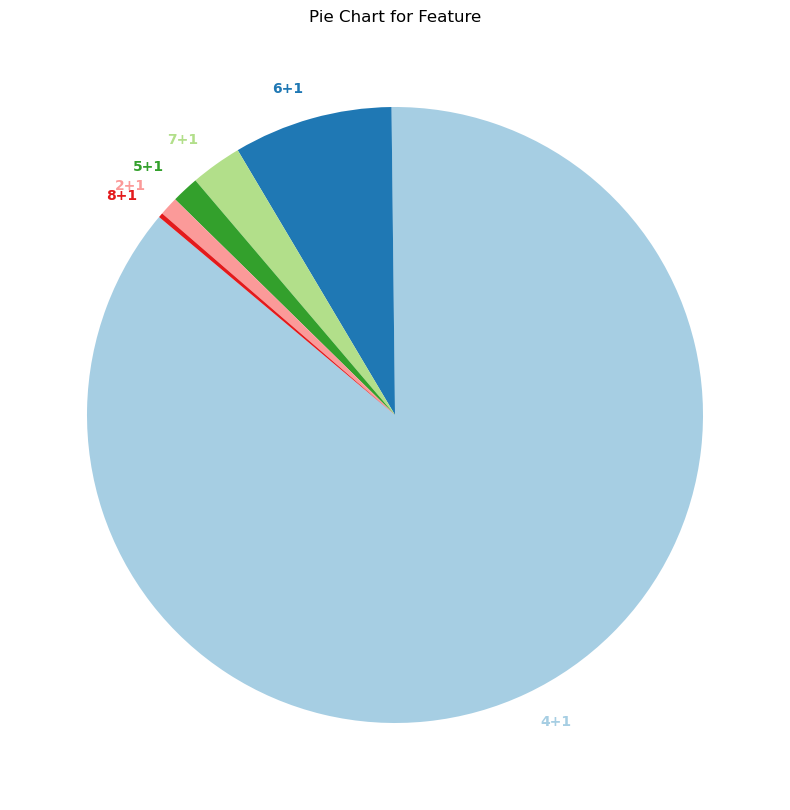

In [270]:
pie_plot(cars_data['passengers'])

# convert the passengers to int  

In [271]:
cars_data['passengers'].dtype

dtype('O')

In [272]:
cars_data['passengers'].isna().sum()

0

In [273]:
def convert_to_numeric(value):
    if isinstance(value, str):
        parts = value.split('+')
        if len(parts) == 2:
            return int(parts[0]) + int(parts[1])
    return value  # Return the original value for non-string or invalid formats

cars_data['passengers'] = cars_data['passengers'].apply(convert_to_numeric)


In [274]:
cars_data['passengers'].unique()

array([5, 8, 7, 6, 3, 9], dtype=int64)

In [275]:
cars_data['passengers'] = cars_data['passengers'].astype('int64')

In [276]:
missing_values_in_the_features = cars_data.isnull().sum()
missing_values_in_the_features

Name                   0
model                  0
Price(NIS)             0
color                  0
fuel_type              0
origin_car             0
car_license            0
lime_type              0
glass                  0
motor_power            0
car_speedometer        0
passengers             0
ex_owners              0
Number_of_Additions    0
sunroof                0
dtype: int64

In [277]:
cars_data['Number_of_Additions'] = cars_data['Number_of_Additions'].astype('int64')

# Now all features (numeric Features) having no missing values OR outliers 

In [278]:
cars_data.reset_index()

,index,Name,model,Price(NIS),color,fuel_type,origin_car,car_license,lime_type,glass,motor_power,car_speedometer,passengers,ex_owners,Number_of_Additions,sunroof
0,0,كيا اوبتيما,2014,100000,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,75000.0,5,1,7,1.0
1,3,كيا سورينتو,2007,60000,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,130000.0,8,2,7,1.0
2,4,هونداي افانتي,2006,43500,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,70000.0,5,1,7,0.0
3,7,بيجو 208,2014,54000,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,38000.0,5,1,5,0.0
4,9,اوبل كورسا,2015,65000,بترولي,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1400,123456.0,5,1,7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4941,6981,سيت ارونا,2021,115000,أحمر,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1000,20000.0,5,0,7,0.0
4942,6982,فورد فيستا,2012,30000,سكني,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1250,10000.0,5,3,3,0.0
4943,6983,مرسيدس C220,2009,90000,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200,180000.0,5,2,7,1.0
4944,6984,نيسان كشكاي,2014,95000,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,70000.0,5,1,6,1.0


# Try to normalize and Handle Skewed Distributions

In [279]:
from_here = cars_data.copy()
from_here 
cars_data = from_here.copy()

In [280]:
cars_data.kurt()

C:\Users\IMOE001\AppData\Local\Temp\ipykernel_2492\112665499.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cars_data.kurt()


model                  2.178241
Price(NIS)             0.136740
motor_power            1.085897
car_speedometer        1.798326
passengers             5.342821
ex_owners              0.666714
Number_of_Additions    0.850195
sunroof               -0.439008
dtype: float64

In [281]:
cars_data.skew()



C:\Users\IMOE001\AppData\Local\Temp\ipykernel_2492\3884956662.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cars_data.skew()


model                 -1.452954
Price(NIS)             0.727353
motor_power            0.776713
car_speedometer        1.151744
passengers             2.147018
ex_owners              1.065441
Number_of_Additions   -1.310244
sunroof                1.249468
dtype: float64

# Normlaize model  : -1.452954  ,  passengers :  2.147018 , Price(NIS) : 0.727353 

# Most of Our data is positively skewed => right tail of the distribution 


# But execpt modle and Number_of_Additions  is Negtivaly skewed

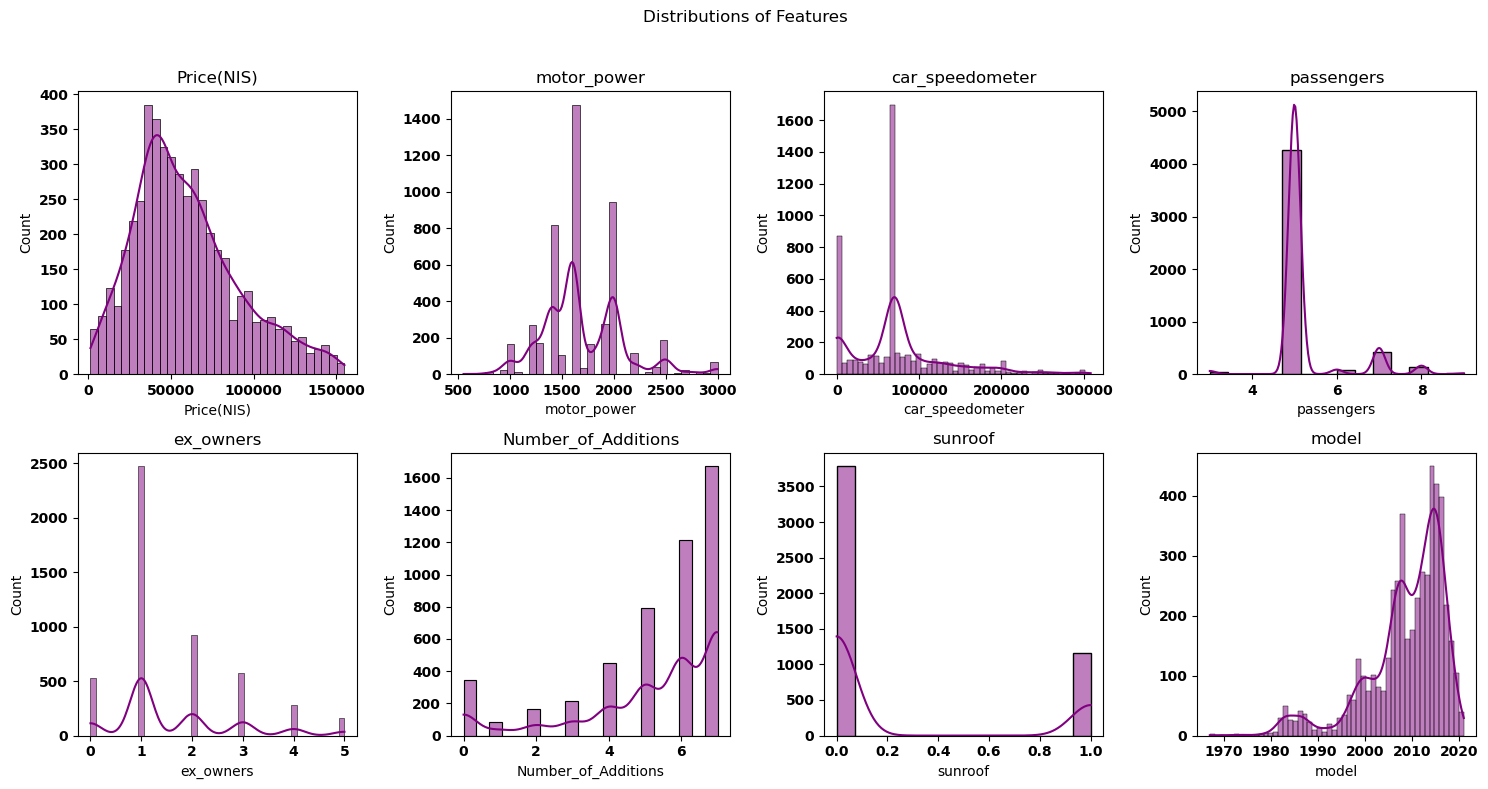

In [282]:
features_to_plot = ['Price(NIS)', 'motor_power', 'car_speedometer', 'passengers', 'ex_owners', 'Number_of_Additions', 'sunroof','model']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
fig.suptitle('Distributions of Features')

axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    sns.histplot(cars_data[feature], kde=True,  color='Purple' ,  ax=axes[i])
    axes[i].set_title(feature)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [283]:
def hist_plot (The_feature) : 
    plt.figure(figsize=(8, 6))
    sns.histplot(The_feature, kde=True, color='pink')
    plt.xlabel('price_transformation')
    plt.ylabel('Frequency')
    skewness = The_feature.skew()
    print(f"Skewness: {skewness}")
    plt.show()



Skewness: -1.3134276067957271


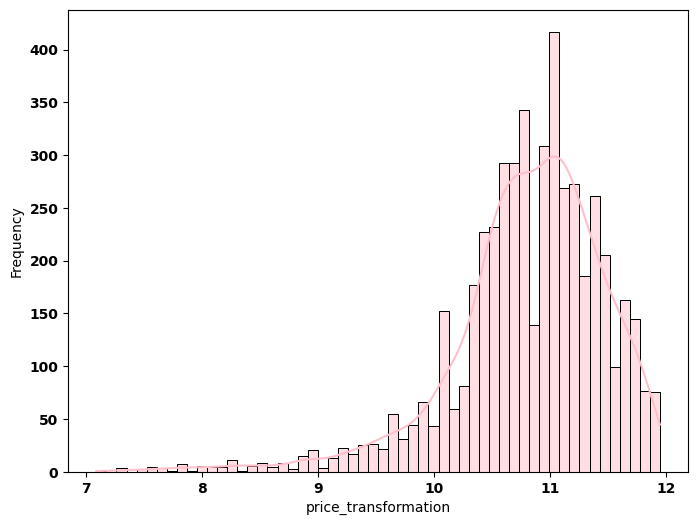

In [284]:
price_log_transformation = log_transformation(cars_data['Price(NIS)'])
hist_plot(price_log_transformation)

Skewness: 8.482810954776367


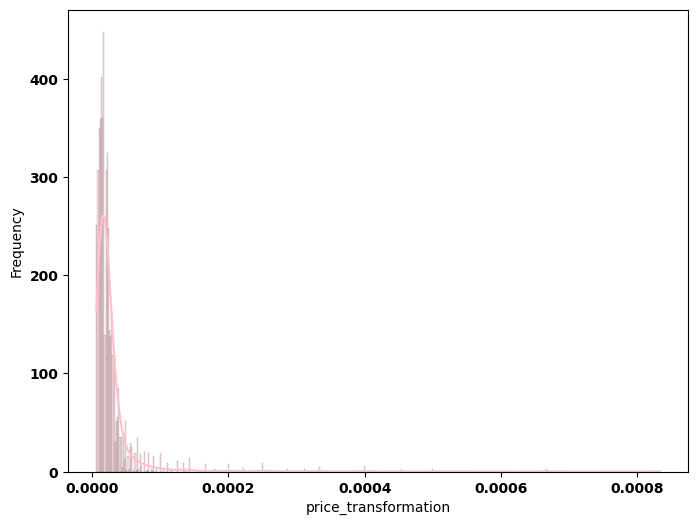

In [285]:
price_Reciprocal_transformation = Reciprocal_transformation(cars_data['Price(NIS)'])
hist_plot(price_Reciprocal_transformation)

Skewness: -0.02694857384311523


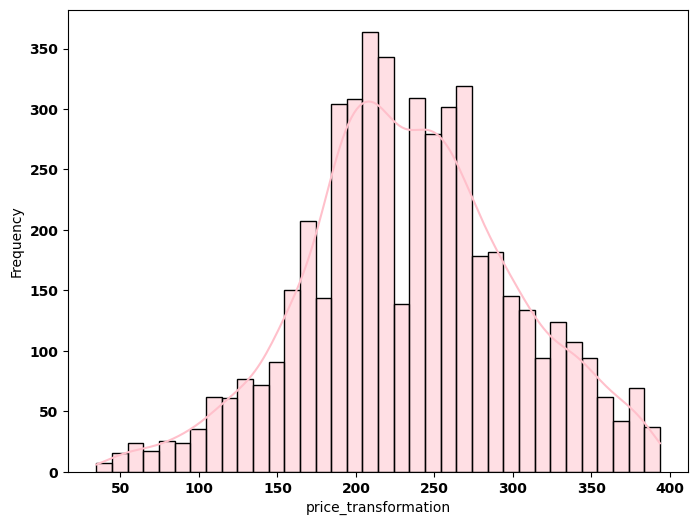

In [286]:
price_square_root_transformation = square_root_transformation(cars_data['Price(NIS)'])
hist_plot(price_square_root_transformation)

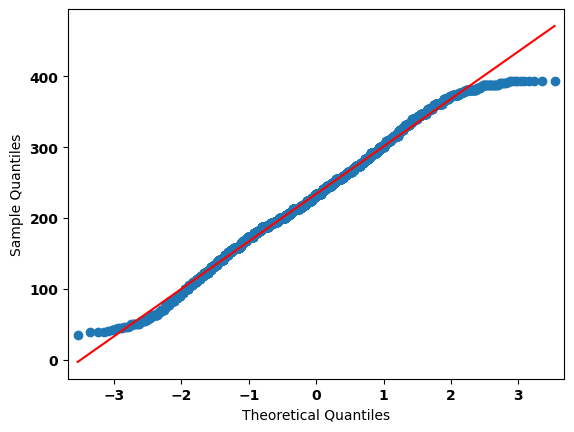

In [287]:
feature_to_plot = price_square_root_transformation
sm.qqplot(feature_to_plot ,  line='s')
plt.show()

# So we choose the square_root transformation 

In [288]:
root_transformed_data = square_root_transformation(cars_data['Price(NIS)'])
cars_data['Price(NIS)'] = root_transformed_data
transformation_info = {'transformation_function': square_root_transformation, 'transformed_features': root_transformed_data}
with open('root_transformation_info.pkl', 'wb') as file:
    pickle.dump(transformation_info, file)

In [289]:
cars_data['Price(NIS)'].min()

34.64101615137755

In [290]:
cars_data['Price(NIS)'].max()

393.70039370059055

In [135]:
Reciprocal_transformed_data = Reciprocal_transformation(cars_data ['passengers'])
cars_data ['passengers'] = Reciprocal_transformed_data
Reciprocal_transformation_info = {'transformation_function': Reciprocal_transformation , 'transformed_features': Reciprocal_transformed_data}
with open('Reciprocal_transformation_info.pkl', 'wb') as file:
    pickle.dump(Reciprocal_transformation_info, file)
   

# The Target Variable is approximately normal.

In [136]:
#Try to normlize the passengers 

In [137]:
passengers_log_transformation = log_transformation(cars_data['passengers'])

Skewness: -1.297258064574372


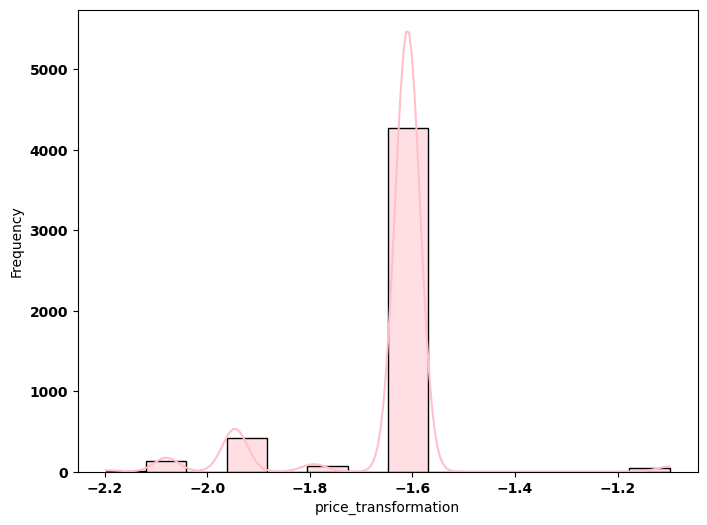

In [138]:
hist_plot(passengers_log_transformation)

In [139]:
passengers_square_root = square_root_transformation(cars_data['passengers'])

Skewness: -0.5883382565217814


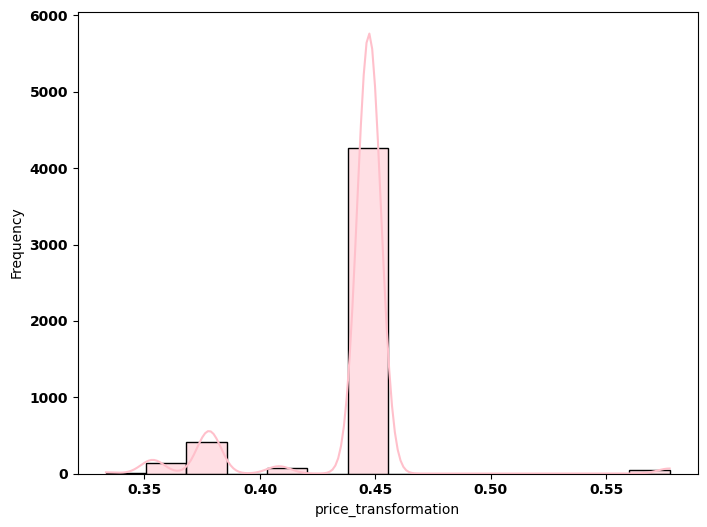

In [140]:
hist_plot(passengers_square_root)

Skewness: 2.1470184830777583


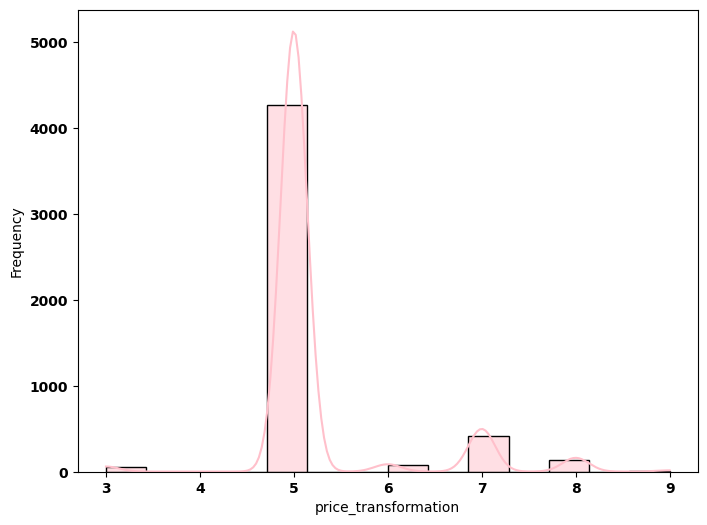

In [141]:
passengers_Reciprocal_transformation =  Reciprocal_transformation(cars_data['passengers'])
hist_plot(passengers_Reciprocal_transformation)

# tranforme data using Reciprocal_transformation

# value of Kurtosis of passengers : 5.342821 before transformation


In [142]:
def save_reciprocal_transformation_info(dataframe, feature_name):
    transformed_data = Reciprocal_transformation(dataframe[feature_name])
    transformation_info = {'transformation_function': Reciprocal_transformation, 'transformed_features': transformed_data}
    
    with open(f'{feature_name}_transformation_info.pkl', 'wb') as file:
        pickle.dump(transformation_info, file)

        
Reciprocal_transformed_data = Reciprocal_transformation(cars_data['passengers'])
cars_data['passengers'] = Reciprocal_transformed_data
save_reciprocal_transformation_info(cars_data, 'passengers')


Skewness: 2.1470184830777583


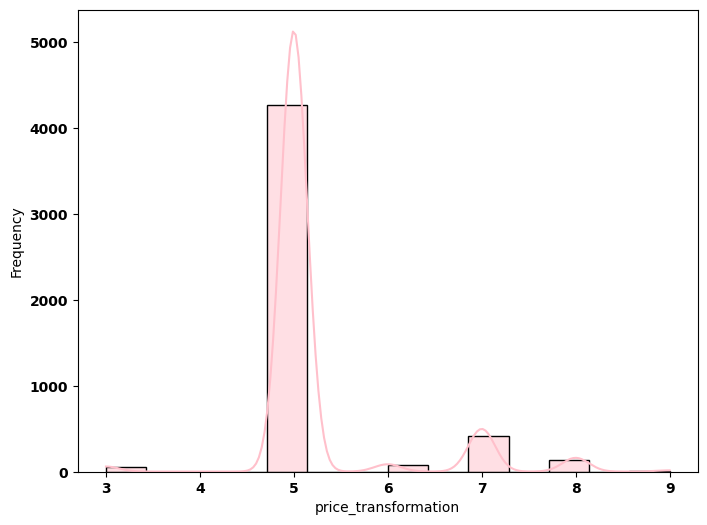

In [143]:
hist_plot(cars_data['passengers'])

In [144]:
cars_data['passengers'].kurt() #WOW :) 

5.342821456159321

In [145]:
cars_data.skew()

C:\Users\IMOE001\AppData\Local\Temp\ipykernel_2492\3188081548.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cars_data.skew()


model                 -1.452954
Price(NIS)            -0.026949
motor_power            0.776713
car_speedometer        1.151744
passengers             2.147018
ex_owners              1.065441
Number_of_Additions   -1.310244
sunroof                1.249468
dtype: float64

Skewness: -1.4594182964332791


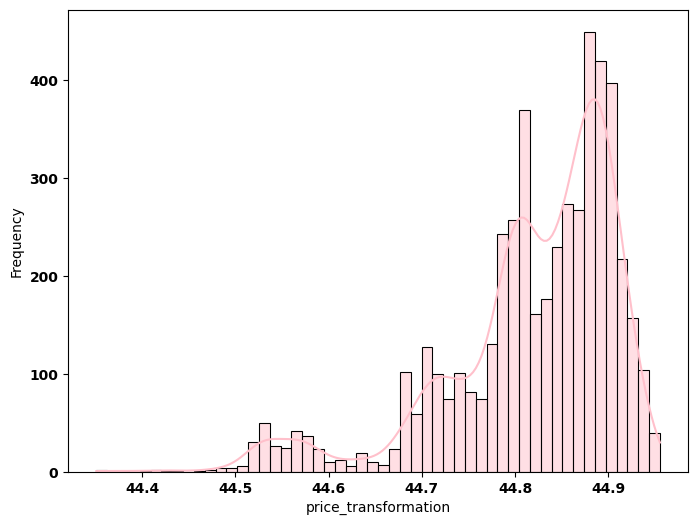

In [146]:
modle_square_root_transformation = square_root_transformation(cars_data['model'])
hist_plot(modle_square_root_transformation)

Skewness: 1.4789063360191164


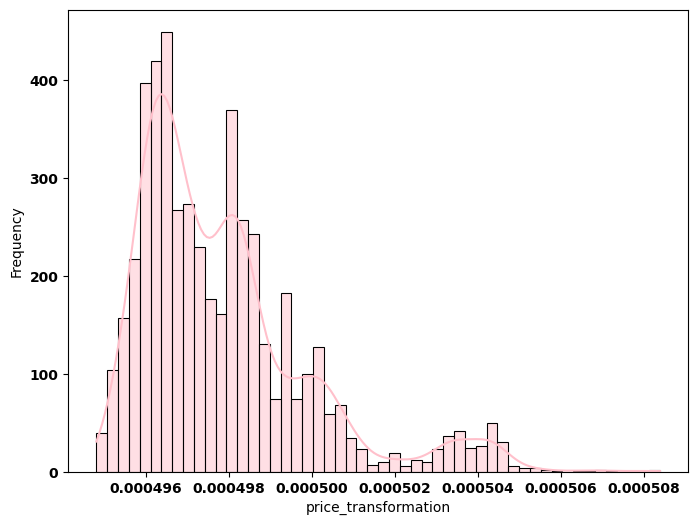

In [147]:
modle_Reciprocal_transformation =  Reciprocal_transformation(cars_data['model'])
hist_plot(modle_Reciprocal_transformation )

Skewness: -1.4658986318877372


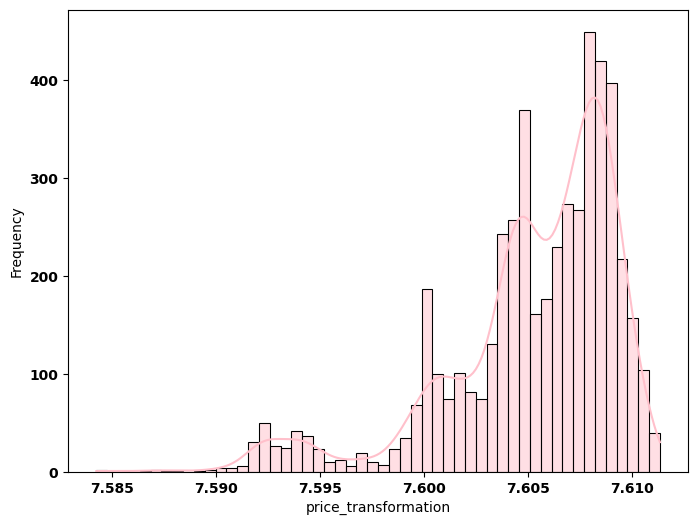

In [148]:
modle_log_transformation = log_transformation(cars_data['model'])
hist_plot(modle_log_transformation)

# NO effect OF Transformation  

# Done of NORMLIZE Features

# Scalling - The numeric data between [0,1] 

In [149]:
cars_data

,Name,model,Price(NIS),color,fuel_type,origin_car,car_license,lime_type,glass,motor_power,car_speedometer,passengers,ex_owners,Number_of_Additions,sunroof
0,كيا اوبتيما,2014,316.227766,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,75000.0,5.0,1,7,1.0
3,كيا سورينتو,2007,244.948974,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,130000.0,8.0,2,7,1.0
4,هونداي افانتي,2006,208.566536,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,70000.0,5.0,1,7,0.0
7,بيجو 208,2014,232.379001,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,38000.0,5.0,1,5,0.0
9,اوبل كورسا,2015,254.950976,بترولي,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1400,123456.0,5.0,1,7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,سيت ارونا,2021,339.116499,أحمر,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1000,20000.0,5.0,0,7,0.0
6982,فورد فيستا,2012,173.205081,سكني,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1250,10000.0,5.0,3,3,0.0
6983,مرسيدس C220,2009,300.000000,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200,180000.0,5.0,2,7,1.0
6984,نيسان كشكاي,2014,308.220700,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,70000.0,5.0,1,6,1.0


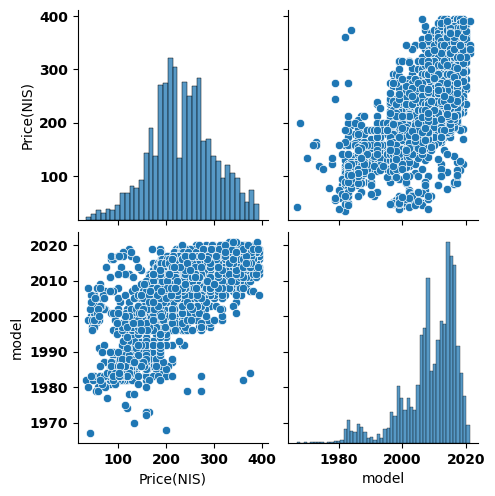

In [150]:
columns_of_interest = ['Price(NIS)', 'model']

# Create a pair plot
sns.pairplot(cars_data[columns_of_interest], height=2.5)
plt.show()

In [153]:
after_normalized = min_max_normalization(cars_data , ['Price(NIS)', 'model'] )
after_normalized

,Name,model,Price(NIS),color,fuel_type,origin_car,car_license,lime_type,glass,motor_power,car_speedometer,passengers,ex_owners,Number_of_Additions,sunroof
0,كيا اوبتيما,0.870370,0.784234,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,75000.0,5.0,1,7,1.0
3,كيا سورينتو,0.740741,0.585719,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,130000.0,8.0,2,7,1.0
4,هونداي افانتي,0.722222,0.484392,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,70000.0,5.0,1,7,0.0
7,بيجو 208,0.870370,0.550711,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,38000.0,5.0,1,5,0.0
9,اوبل كورسا,0.888889,0.613575,بترولي,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1400,123456.0,5.0,1,7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,سيت ارونا,1.000000,0.847981,أحمر,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1000,20000.0,5.0,0,7,0.0
6982,فورد فيستا,0.833333,0.385908,سكني,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1250,10000.0,5.0,3,3,0.0
6983,مرسيدس C220,0.777778,0.739039,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200,180000.0,5.0,2,7,1.0
6984,نيسان كشكاي,0.870370,0.761934,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,70000.0,5.0,1,6,1.0


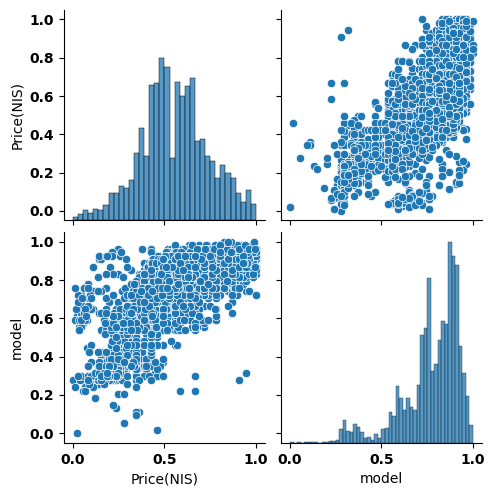

In [154]:
columns_of_interest = ['Price(NIS)', 'model']

# Create a pair plot
sns.pairplot(after_normalized[columns_of_interest], height=2.5)
plt.show()

# This means that the Type of correlation after Scalling was not affected  

In [152]:
def min_max_normalization(dataframe, features_to_normalize):
    if not features_to_normalize:
        # Handle case when features_to_normalize is empty
        return dataframe

    # Separate the 'Price(NIS)' feature from the rest
    price_feature = 'Price(NIS)'
    other_features = [feature for feature in features_to_normalize if feature != price_feature]

    # Create a scaler for 'Price(NIS)'
    scaler_price = MinMaxScaler()
    dataframe[price_feature] = scaler_price.fit_transform(dataframe[price_feature].values.reshape(-1, 1))

    # Create a scaler for the rest of the features
    scaler_other = MinMaxScaler()
    dataframe[other_features] = scaler_other.fit_transform(dataframe[other_features])

    # Save the scalers and features to separate pickle files
    with open('scaler_price.pkl', 'wb') as scaler_file_price:
        pickle.dump({'scaler': scaler_price, 'features': [price_feature]}, scaler_file_price)

    with open('scaler_other.pkl', 'wb') as scaler_file_other:
        pickle.dump({'scaler': scaler_other, 'features': other_features}, scaler_file_other)

    # Save information about the inverse transformation
    inverse_transform_info_price = {'transformation_function': scaler_price.inverse_transform, 'features': [price_feature]}
    inverse_transform_info_other = {'transformation_function': scaler_other.inverse_transform, 'features': other_features}

    with open('inverse_transform_info_price.pkl', 'wb') as inverse_transform_file_price:
        pickle.dump(inverse_transform_info_price, inverse_transform_file_price)

    with open('inverse_transform_info_other.pkl', 'wb') as inverse_transform_file_other:
        pickle.dump(inverse_transform_info_other, inverse_transform_file_other)

    return dataframe



In [ ]:
variables_columns_to_scall = ['Price(NIS)', 'model','motor_power' , 'car_speedometer' , 'passengers' , 'ex_owners' , 'Number_of_Additions' ]
min_max_normalization(cars_data , variables_columns_to_scall )
cars_data

In [156]:
cars_data

,Name,model,Price(NIS),color,fuel_type,origin_car,car_license,lime_type,glass,motor_power,car_speedometer,passengers,ex_owners,Number_of_Additions,sunroof
0,كيا اوبتيما,0.870370,0.784234,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,75000.0,5.0,1,7,1.0
3,كيا سورينتو,0.740741,0.585719,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,130000.0,8.0,2,7,1.0
4,هونداي افانتي,0.722222,0.484392,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,70000.0,5.0,1,7,0.0
7,بيجو 208,0.870370,0.550711,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,38000.0,5.0,1,5,0.0
9,اوبل كورسا,0.888889,0.613575,بترولي,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1400,123456.0,5.0,1,7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,سيت ارونا,1.000000,0.847981,أحمر,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1000,20000.0,5.0,0,7,0.0
6982,فورد فيستا,0.833333,0.385908,سكني,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1250,10000.0,5.0,3,3,0.0
6983,مرسيدس C220,0.777778,0.739039,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200,180000.0,5.0,2,7,1.0
6984,نيسان كشكاي,0.870370,0.761934,فيراني,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,70000.0,5.0,1,6,1.0


In [157]:
cars_data['Price(NIS)'].min()

0.0

In [158]:
cars_data['Price(NIS)'].max()

1.0

# Now compute The corelation between all numeric features and Target Variable 

In [ ]:
features_to_plot = ['Price(NIS)', 'motor_power', 'car_speedometer', 'passengers', 'ex_owners', 'Number_of_Additions', 'sunroof' ,'model']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
fig.suptitle('Scatter Plots and Correlations with Price')

# Flatten the axes for easier indexing
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    sns.scatterplot(x=cars_data[feature], y=cars_data['Price(NIS)'], ax=axes[i])
    correlation_coefficient = cars_data[feature].corr(cars_data['Price(NIS)'])
    axes[i].annotate(f'Corr: {correlation_coefficient:.2f}', xy=(0.5, 1.05), xycoords='axes fraction', ha='center', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# The strongest relationship is between price and model, which is a positive relationship

# The weakest relationship is between price and the car’s speedometer, and their relationship is negative

# Categorical Feature 

# glass feature

In [ ]:
font_properties = {'font.family': 'Arial', 'font.size': 10, 'font.sans-serif': ['Arial'], 'text.usetex': False}
matplotlib.rcParams.update(font_properties)

features_to_plot = ['fuel_type', 'car_license', 'lime_type', 'glass']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Pie Charts of Categorical Features')

# Flatten the axes for easier indexing
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    # Count the occurrences of each category in the feature
    feature_counts = cars_data[feature].value_counts()

    # Reshape and reorder Arabic text
    labels = [get_display(arabic_reshaper.reshape(label)) for label in feature_counts.index]

    # Plot a pie chart
    pie = axes[i].pie(feature_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(feature)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# This   features are imbalanced

In [ ]:
cars_data

In [ ]:
cars_data['origin_car'].unique()


In [ ]:
cars_data['color'].unique()

In [ ]:
categorical_features = ['color', 'origin_car']
fig, axes = plt.subplots(nrows=len(categorical_features), figsize=(10, 6 * len(categorical_features)))
fig.suptitle('Bar Charts of Categorical Features', y=1.02)
for i, feature in enumerate(categorical_features):
    feature_counts = cars_data[feature].value_counts()
    labels = [get_display(arabic_reshaper.reshape(label)) for label in feature_counts.index]
    sns.countplot(x=feature, data=cars_data, ax=axes[i], order=feature_counts.index)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xticklabels(labels)
plt.tight_layout()
plt.show()


# Convert the  features from nominal to Numeric 

# the features that have two - values use LabelEncoder to convert it 

In [ ]:
def Label_Encoder(The_feature):
    label_encoder = LabelEncoder()
    The_feature_encoded = label_encoder.fit_transform(The_feature)
    return The_feature_encoded

In [ ]:
features_that_have_two_values = ['car_license', 'glass']
for feature in features_that_have_two_values:
    cars_data[feature] = Label_Encoder(cars_data[feature])


In [ ]:
cars_data 

# Now use one-hot encoding to convert feature which contains more than two values (classes)

In [ ]:
def OneHot_Encoder(data, column):
    onehot_encoded_columns = pd.get_dummies(data[column], prefix=f'{column}-')
    data = pd.concat([data, onehot_encoded_columns], axis=1)
    data.drop(column, axis=1, inplace=True)
    return data

In [ ]:
features_have_more_than_two_values = ['Name','color', 'fuel_type','origin_car','lime_type']
for feature in features_have_more_than_two_values:
    cars_data= OneHot_Encoder(cars_data ,feature)


In [ ]:
cars_data.reset_index()


# Now the data is ready to use 

In [ ]:
X = cars_data.drop(['Price(NIS)'],axis=1)  
y = cars_data['Price(NIS)']  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    'Linear Regression (Degree 1)': LinearRegression(),
    'Ridge Regression (Degree 1)': Ridge(alpha=1.0),
    'Lasso Regression (Degree 1)': Lasso(alpha=1.0),
    'Polynomial Regression (Degree 2)': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'Ridge Regression (Degree 2)': make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1.0)),
    'Lasso Regression (Degree 2)': make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=1.0)),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=3),
    'Decision Tree': DecisionTreeRegressor(random_state=0)
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    
    results[model_name] = {
        'MSE_train': mse_train,
        'R2_train': r2_train,
        'MSE_test': mse_test,
        'R2_test': r2_test
    }

for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"R-squared (Training): {metrics['R2_train']}")
    print(f"R-squared (Testing): {metrics['R2_test']}")
    
    print(f"Mean Squared Error (Training): {metrics['MSE_train']}")
    print(f"Mean Squared Error (Testing): {metrics['MSE_test']}")


# The Best Model for use is Ridge Regression (Degree 1)


# R-squerd for it 0.8 and MSE = 0.0077

In [ ]:
# Assuming you have the results available in variables like r2_train, r2_test, mse_train, mse_test
results_dict = {
    'Linear Regression (Degree 1)': {
        'R-squared (Training)': 0.8590414261282553,
        'R-squared (Testing)': -4.377152074964761e+19,
        'Mean Squared Error (Training)': 0.004817314454157538,
        'Mean Squared Error (Testing)': 1.635786825066841e+18,
    },
    'Ridge Regression (Degree 1)': {
        'R-squared (Training)': 0.8456910183602393,
        'R-squared (Testing)': 0.7928622692858215,
        'Mean Squared Error (Training)': 0.005273569866959013,
        'Mean Squared Error (Testing)': 0.007740950395908376,
    },
    'Lasso Regression (Degree 1)': {
        'R-squared (Training)': 0.0,
        'R-squared (Testing)': -0.0004996010914921634,
        'Mean Squared Error (Training)': 0.0341753915483049,
        'Mean Squared Error (Testing)': 0.037389700835634525,
    },
    'Polynomial Regression (Degree 2)': {
        'R-squared (Training)': 0.9594533955779442,
        'R-squared (Testing)': -7.196364751207202e+21,
        'Mean Squared Error (Training)': 0.0013856960820779875,
        'Mean Squared Error (Testing)': 2.689355646501025e+20,
    },
    'Ridge Regression (Degree 2)': {
        'R-squared (Training)': 0.9401354600084536,
        'R-squared (Testing)': 0.7974223935561945,
        'Mean Squared Error (Training)': 0.002045894094070254,
        'Mean Squared Error (Testing)': 0.007570533853956182,
    },
    'Lasso Regression (Degree 2)': {
        'R-squared (Training)': 0.0,
        'R-squared (Testing)': -0.0004996010914921634,
        'Mean Squared Error (Training)': 0.0341753915483049,
        'Mean Squared Error (Testing)': 0.037389700835634525,
    },
    'K-Nearest Neighbors': {
        'R-squared (Training)': 0.8119308307004252,
        'R-squared (Testing)': 0.6008887607152252,
        'Mean Squared Error (Training)': 0.006427337498977414,
        'Mean Squared Error (Testing)': 0.014915198187702674,
    },
    'Decision Tree': {
        'R-squared (Training)': 0.999869942636763,
        'R-squared (Testing)': 0.6482851582333176,
        'Mean Squared Error (Training)': 4.444761312365821e-06,
        'Mean Squared Error (Testing)': 0.013143945983348991,
    },
}



In [ ]:
#TO print the result in clear way

In [ ]:
for model_name, metrics in results_dict.items():
    print(model_name + ":")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()

In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_train = ridge_model.predict(X_train)
y_pred_test = ridge_model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
    
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"R-squared (Training):" ,r2_train )
print(f"R-squared (Testing): " , r2_test)
    
print(f"Mean Squared Error (Training):" ,mse_train )
print(f"Mean Squared Error (Testing):",mse_test)


In [ ]:
with open('ridge_model.pkl', 'wb') as model_file:
    pickle.dump(ridge_model, model_file)